# Lab 5: Competitive learning on the MNIST database

## Learning Outcomes
- Understand how competive learning works.
- Ability to develop and tune a simple neural network using competitive learning.

## Lecture Overview

### Competitive learning
- In competitive learning, the output neurons compete among themselves to be activated (fire).
- In contrast with the Hebbian learning, here only one neuron (or group of neurons) can be activate at a time.
- The output neuron that wins the competitionis is often called winner-take-all neuron.

<img src="http://bitsandchips.me/COM3240_Adaptive_Intelligence/Lecture5/icons/fig1.png" width="500">


### Main steps for compatitive learning implementation:
1. Generate a set of output neurons with random weights.
2. Choose a random input pattern and calculate the activation of each of the output neurons.
3. Detect the winner neuron and update only its weights; the weights of the other neurons are not updated:  , where  is the winner neuron,  is the learning rate and  is the input vector.
4. Repeat from step 2 until the weights are no longer changing, or change less than a set threshold, or a set maximum number of iterations has been reached.

### Some optimisation and tuning methods:
1. Normalised input or initial weights.
2. Noise addition on the weights.
3. Decaying learning rate.
4. Leaky learning: update the weights of the losers as well as winners but with a much smaller learning rate.
5. Update the winners and neighbouring losers.

### K-means clustering
Clustering: given a set of datapoints we want to group them based on their similarity. Each one of these groups is called cluster.

In k-means clustering the task is to separate our data into k clusters. However specifying the number of clusters k is a common problem in machine learning and there are various different methods for finding the optimal k.

The k-means algorithm is the following:
<img src="http://bitsandchips.me/COM3240_Adaptive_Intelligence/Lecture5/icons/fig2.png" width="500">

### Competitive learning vs K-means clustering
Essentially they are equivalent.

Competitive learning leads to clusters since each output neuron after training is firing on a certain input (has learn a specific data pattern).
The terms centroid and protorype are equivalent.

## Laboratory 5: Competitive learning on the MNIST database

### Exercise
The aim of this lab is to implement the standard competitive learning algorithm on a one layer network and use it to classify the hand written digits set. You may use the max operator to find the winner for each input. Please choose the number of output units such that you can capture all classes and tune the network such that it will learn quickly and result in as few dead units as possible. One suggestion is to add noise to the decision neurons, in combination with an appropriate decaying learning rate, but you are free to apply other techniques. In this example you are able to visualise both data and prototypes, and can easily locate the dead units. The vectors provided are 28x28 images and you can reshape them to see the digits. Propose a method for detecting dead units, without using the visualisation of the prototypes. Note: It is a good and sometimes necessary practice to normalise the weight vector and the data at the beginning of the process.

You will need to produce the following :
1. A figure showing the average weight change as a function of time. When your network has sufficiently learned from the data? If you implement an on-line version of the rule you may use a moving average to produce a smooth curve of the weight changes through time. Such a curve may be more informative on semi-log or log-log axes.
2. A figure of the prototypes and a comment on what they represent. How many prototypes did your network find?
3. The correlation matrix of the prototypes. How can you use this information to find similarities between the prototypes?

In [107]:
import numpy as np
import numpy.matlib
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the data set

In [108]:
train = np.genfromtxt ('letters.csv', delimiter=",")
trainlabels = np.genfromtxt ('letterslabels.csv', delimiter=",")

[7744, 7000]


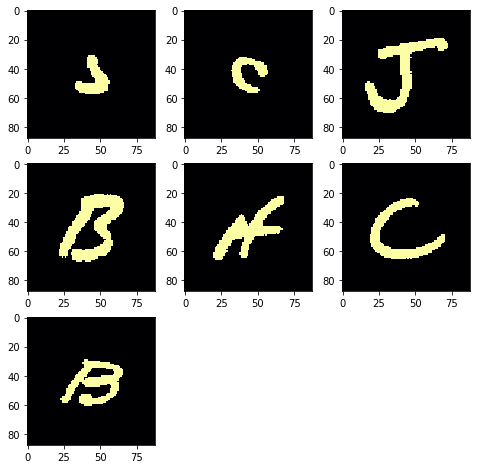

In [109]:
[n,m]  = np.shape(train)                    # number of pixels and number of training data
pix = int(math.sqrt(n))
print([n,m])

fig = plt.figure(figsize=(8,8))
columns = 3
rows = 3
for y in range(columns*rows-2):
    fig.add_subplot(rows, columns, y+1)
    image = np.reshape(train[:,y],(pix,pix),order="F")
    plt.imshow(image, cmap = 'inferno');

#### Parameters and variables 

In [110]:
[n,m]  = np.shape(train)                    # number of pixels and number of training data
eta    = 0.05                            # learning rate
winit  = 1                                  # parameter controlling magnitude of initial conditions
alpha = 0.990

tmax   = 40000
letters = 10

W = winit * np.random.rand(letters,n)        # Weight matrix (rows = output neurons, cols = input neurons)
normW = np.sqrt(np.diag(W.dot(W.T)))
normW = normW.reshape(letters,-1)            # reshape normW into a numpy 2d array

W = W / np.matlib.repmat(normW.T,n,1).T    # normalise using repmat
# W = W / normW                               # normalise using numpy broadcasting -  http://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html

noise = np.random.normal(0,1,(letters,n))   # add noise
W = W + noise
print(W.shape)

counter = np.zeros((1,letters))              # counter for the winner neurons
wCount = np.ones((1,tmax+1)) * 0.25         # running avg of the weight change over time

(10, 7744)


####  Implementation, training and output

In [111]:
for t in range(1,tmax):
    i = math.ceil(m * np.random.rand())-1   # get a randomly generated index in the input range
    x = train[:,i]                          # pick a training instance using the random index

    h = W.dot(x)/letters                     # get output firing
    h = h.reshape(h.shape[0],-1)            # reshape h into a numpy 2d array

    output = np.max(h)                      # get the max in the output firing vector
    k = np.argmax(h)                        # get the index of the firing neuron

    counter[0,k] += 1                       # increment counter for winner neuron
    print(counter)

    dw = (eta) * (x.T - W[k,:])               # calculate the change in weights for the k-th output neuron
                                            # get closer to the input (x - W)

    wCount[0,t] = wCount[0,t-1] * (alpha + dw.dot(dw.T)*(1-alpha)) # % weight change over time (running avg)
    
    W[k,:] = W[k,:] + dw                    # weights for k-th output are updated

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 2. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 2. 0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 3. 0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 3. 0. 0. 0. 0. 0. 2.]]
[[1. 0. 0. 3. 0. 0. 0. 0. 0. 3.]]
[[1. 0. 0. 3. 0. 0. 0. 0. 1. 3.]]
[[1. 0. 0. 3. 0. 0. 0. 0. 1. 4.]]
[[2. 0. 0. 3. 0. 0. 0. 0. 1. 4.]]
[[2. 0. 0. 3. 0. 1. 0. 0. 1. 4.]]
[[2. 0. 0. 3. 0. 1. 0. 0. 1. 5.]]
[[2. 0. 0. 3. 0. 1. 0. 0. 1. 6.]]
[[2. 0. 0. 3. 0. 1. 0. 0. 1. 7.]]
[[2. 0. 0. 3. 0. 1. 0. 0. 1. 8.]]
[[2. 0. 0. 3. 0. 1. 0. 0. 1. 9.]]
[[ 2.  0.  0.  3.  0.  1.  0.  0.  1. 10.]]
[[ 2.  0.  0.  3.  0.  1.  0.  0.  2. 10.]]
[[ 2.  0.  0.  3.  0.  1.  0.  0.  2. 11.]]
[[ 2.  0.  0.  3.  0.  1.  0.  0.  2. 12.]]
[[ 2.  0.  0.  3.  0.  1.  0.  0.  2. 13.]]
[[ 2.  0.  0.  3.  0.  1.  0.  0.  2. 14.]]
[[ 2.  0.  0.  3.  0.  1.  0.  0.  2. 15.]]
[[ 2.  0.  0.  3.  0.  1.  0.  0.  2. 16.]]
[[ 2.  0.  0.  3.  0.  1.  0.  0.  2. 17.]]
[[ 2.  0.  0.  3.  0.  1.  0.  0.  2. 18.]]
[[ 2.  0.  0.  3

[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 220.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 221.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 222.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 223.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 224.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 225.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 226.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 227.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 228.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 229.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 230.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 231.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 232.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 233.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 234.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 235.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 236.]]
[[  2.   0.   0.   4.   0.   1.   0.   0.   3. 237.]]
[[  2.   0.   0.   4.   0.  

[[  2.   0.   0.   5.   0.   1.   0.   0.   3. 559.]]
[[  2.   0.   0.   5.   0.   1.   0.   0.   3. 560.]]
[[  2.   0.   0.   5.   0.   1.   0.   0.   3. 561.]]
[[  2.   0.   0.   5.   0.   1.   0.   0.   3. 562.]]
[[  2.   0.   0.   5.   0.   1.   0.   0.   3. 563.]]
[[  2.   0.   0.   5.   0.   1.   0.   0.   3. 564.]]
[[  2.   0.   0.   5.   0.   1.   0.   0.   3. 565.]]
[[  2.   0.   0.   5.   0.   1.   0.   0.   3. 566.]]
[[  2.   0.   0.   6.   0.   1.   0.   0.   3. 566.]]
[[  2.   0.   0.   6.   0.   1.   0.   0.   3. 567.]]
[[  2.   0.   0.   6.   0.   1.   0.   0.   3. 568.]]
[[  2.   0.   0.   6.   0.   1.   0.   0.   3. 569.]]
[[  2.   0.   0.   6.   0.   1.   0.   0.   3. 570.]]
[[  2.   0.   0.   6.   0.   1.   0.   0.   3. 571.]]
[[  2.   0.   0.   6.   0.   1.   0.   0.   3. 572.]]
[[  2.   0.   0.   6.   0.   1.   0.   0.   3. 573.]]
[[  2.   0.   0.   6.   0.   1.   0.   0.   3. 574.]]
[[  2.   0.   0.   6.   0.   1.   0.   0.   3. 575.]]
[[  2.   0.   0.   6.   0.  

[[  2.   0.   0.  13.   0.   1.   0.   0.   3. 921.]]
[[  2.   0.   0.  13.   0.   1.   0.   0.   3. 922.]]
[[  2.   0.   0.  13.   0.   1.   0.   0.   3. 923.]]
[[  2.   0.   0.  13.   0.   1.   0.   0.   3. 924.]]
[[  2.   0.   0.  14.   0.   1.   0.   0.   3. 924.]]
[[  2.   0.   0.  14.   0.   1.   0.   0.   3. 925.]]
[[  2.   0.   0.  14.   0.   1.   0.   0.   3. 926.]]
[[  2.   0.   0.  15.   0.   1.   0.   0.   3. 926.]]
[[  2.   0.   0.  15.   0.   1.   0.   0.   3. 927.]]
[[  2.   0.   0.  15.   0.   1.   0.   0.   3. 928.]]
[[  2.   0.   0.  15.   0.   1.   0.   0.   3. 929.]]
[[  2.   0.   0.  15.   0.   1.   0.   0.   3. 930.]]
[[  2.   0.   0.  15.   0.   1.   0.   0.   3. 931.]]
[[  2.   0.   0.  15.   0.   1.   0.   0.   3. 932.]]
[[  2.   0.   0.  15.   0.   1.   0.   0.   3. 933.]]
[[  2.   0.   0.  15.   0.   1.   0.   0.   3. 934.]]
[[  2.   0.   0.  15.   0.   1.   0.   0.   3. 935.]]
[[  2.   0.   0.  15.   0.   1.   0.   0.   3. 936.]]
[[  2.   0.   0.  15.   0.  

[[2.000e+00 0.000e+00 0.000e+00 1.110e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.208e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.120e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.208e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.120e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.209e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.130e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.209e+03]]
[[2.00e+00 0.00e+00 0.00e+00 1.13e+02 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  3.00e+00 1.21e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.130e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.211e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.140e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.211e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.150e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.211e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.160e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.211e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.170e+02 0.000e+00 1.00

  0.000e+00 3.000e+00 1.225e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.840e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.225e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.850e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.225e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.860e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.225e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.870e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.225e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.880e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.225e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.880e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.226e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.890e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.226e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.900e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.226e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.910e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.226e+03]]
[[2.000e+00 

  0.000e+00 3.000e+00 1.248e+03]]
[[2.000e+00 0.000e+00 0.000e+00 4.530e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.248e+03]]
[[2.000e+00 0.000e+00 0.000e+00 4.540e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.248e+03]]
[[2.000e+00 0.000e+00 0.000e+00 4.550e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.248e+03]]
[[2.000e+00 0.000e+00 0.000e+00 4.560e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.248e+03]]
[[2.000e+00 0.000e+00 0.000e+00 4.570e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.248e+03]]
[[2.000e+00 0.000e+00 0.000e+00 4.580e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.248e+03]]
[[2.000e+00 0.000e+00 0.000e+00 4.590e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.248e+03]]
[[2.000e+00 0.000e+00 0.000e+00 4.600e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.248e+03]]
[[2.000e+00 0.000e+00 0.000e+00 4.610e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.248e+03]]
[[2.000e+00 

[[2.000e+00 0.000e+00 0.000e+00 5.380e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.253e+03]]
[[2.000e+00 0.000e+00 0.000e+00 5.390e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.253e+03]]
[[2.000e+00 0.000e+00 0.000e+00 5.400e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.253e+03]]
[[2.000e+00 0.000e+00 0.000e+00 5.410e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.253e+03]]
[[2.000e+00 0.000e+00 0.000e+00 5.420e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.253e+03]]
[[2.000e+00 0.000e+00 0.000e+00 5.430e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.253e+03]]
[[2.000e+00 0.000e+00 0.000e+00 5.440e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.253e+03]]
[[2.000e+00 0.000e+00 0.000e+00 5.450e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.253e+03]]
[[2.000e+00 0.000e+00 0.000e+00 5.450e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.254e+03]]
[[2.000e+00 0.000e+00 0.000e+00 5.460e+02 0.00

[[2.000e+00 0.000e+00 0.000e+00 7.940e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.275e+03]]
[[2.000e+00 0.000e+00 0.000e+00 7.950e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.275e+03]]
[[2.000e+00 0.000e+00 0.000e+00 7.960e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.275e+03]]
[[2.000e+00 0.000e+00 0.000e+00 7.970e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.275e+03]]
[[2.000e+00 0.000e+00 0.000e+00 7.970e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.276e+03]]
[[2.000e+00 0.000e+00 0.000e+00 7.980e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.276e+03]]
[[2.000e+00 0.000e+00 0.000e+00 7.990e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.276e+03]]
[[2.000e+00 0.000e+00 0.000e+00 8.000e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.276e+03]]
[[2.000e+00 0.000e+00 0.000e+00 8.010e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.276e+03]]
[[2.000e+00 0.000e+00 0.000e+00 8.020e+02 0.00

  3.00e+00 1.28e+03]]
[[2.000e+00 0.000e+00 0.000e+00 8.780e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.281e+03]]
[[2.000e+00 0.000e+00 0.000e+00 8.790e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.281e+03]]
[[2.000e+00 0.000e+00 0.000e+00 8.800e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.281e+03]]
[[2.000e+00 0.000e+00 0.000e+00 8.810e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.281e+03]]
[[2.000e+00 0.000e+00 0.000e+00 8.820e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.281e+03]]
[[2.000e+00 0.000e+00 0.000e+00 8.830e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.281e+03]]
[[2.000e+00 0.000e+00 0.000e+00 8.840e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.281e+03]]
[[2.000e+00 0.000e+00 0.000e+00 8.850e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.281e+03]]
[[2.000e+00 0.000e+00 0.000e+00 8.860e+02 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.281e+03]]
[[2.000e+00 0.000e+00 0.

[[2.000e+00 0.000e+00 0.000e+00 1.121e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.305e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.122e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.305e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.123e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.305e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.123e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.306e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.124e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.306e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.125e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.306e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.126e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.306e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.127e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.306e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.128e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.306e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.128e+03 0.00

  0.000e+00 3.000e+00 1.315e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.199e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.315e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.200e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.315e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.200e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.316e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.200e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.317e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.201e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.317e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.202e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.317e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.203e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.317e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.204e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.317e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.205e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.317e+03]]
[[2.000e+00 

  0.000e+00 4.000e+00 1.338e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.463e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.338e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.464e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.338e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.465e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.338e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.466e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.338e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.467e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.338e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.468e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.338e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.469e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.338e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.470e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.338e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.471e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.338e+03]]
[[2.000e+00 

  0.000e+00 4.000e+00 1.346e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.542e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.346e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.542e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.347e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.543e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.347e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.544e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.347e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.545e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.347e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.546e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.347e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.546e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.348e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.547e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.348e+03]]
[[2.000e+00 0.000e+00 0.000e+00 1.548e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.348e+03]]
[[2.000e+00 

[[3.000e+00 0.000e+00 0.000e+00 1.790e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.367e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.791e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.367e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.791e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.368e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.792e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.368e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.793e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.368e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.794e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.368e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.795e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.368e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.795e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.369e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.796e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.369e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.797e+03 0.00

  0.000e+00 4.000e+00 1.377e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.866e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.377e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.867e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.377e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.868e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.377e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.869e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.377e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.870e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.377e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.871e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.377e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.872e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.377e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.873e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.377e+03]]
[[3.000e+00 0.000e+00 0.000e+00 1.874e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.377e+03]]
[[3.000e+00 

[[3.000e+00 0.000e+00 0.000e+00 2.091e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.407e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.092e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.407e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.093e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.407e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.094e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.407e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.095e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.407e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.096e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.407e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.097e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.407e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.098e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.407e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.098e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.408e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.099e+03 0.00

  0.000e+00 4.000e+00 1.414e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.173e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.414e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.173e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.415e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.174e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.415e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.175e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.415e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.176e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.415e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.177e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.415e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.178e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.415e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.179e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.415e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.179e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 4.000e+00 1.416e+03]]
[[3.000e+00 

[[3.000e+00 0.000e+00 0.000e+00 2.439e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.448e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.440e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.448e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.440e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.449e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.441e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.449e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.442e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.449e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.443e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.449e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.444e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.449e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.444e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.450e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.445e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.450e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.446e+03 0.00

  0.000e+00 5.000e+00 1.459e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.520e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.459e+03]]
[[3.00e+00 0.00e+00 0.00e+00 2.52e+03 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  5.00e+00 1.46e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.521e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.460e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.522e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.460e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.523e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.460e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.524e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.460e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.524e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.461e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.525e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.461e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.526e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.000e+00 1.461e+03]]
[[3.000e+00 0.000e+00 

  0.000e+00 7.000e+00 1.483e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.757e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.483e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.758e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.483e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.759e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.483e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.760e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.483e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.761e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.483e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.762e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.483e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.763e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.483e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.764e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.483e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.765e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.483e+03]]
[[3.000e+00 

  0.000e+00 7.000e+00 1.490e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.836e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.490e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.837e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.490e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.838e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.490e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.839e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.490e+03]]
[[3.00e+00 0.00e+00 0.00e+00 2.84e+03 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  7.00e+00 1.49e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.841e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.490e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.842e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.490e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.843e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.490e+03]]
[[3.000e+00 0.000e+00 0.000e+00 2.844e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.000e+00 1.490e+03]]
[[3.000e+00 0.000e+00 

  0.000e+00 9.000e+00 1.518e+03]]
[[3.000e+00 0.000e+00 0.000e+00 3.092e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.000e+00 1.518e+03]]
[[3.000e+00 0.000e+00 0.000e+00 3.093e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.000e+00 1.518e+03]]
[[3.000e+00 0.000e+00 0.000e+00 3.094e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.000e+00 1.518e+03]]
[[3.000e+00 0.000e+00 0.000e+00 3.095e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.000e+00 1.518e+03]]
[[3.000e+00 0.000e+00 0.000e+00 3.096e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.000e+00 1.518e+03]]
[[3.000e+00 0.000e+00 0.000e+00 3.097e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.000e+00 1.518e+03]]
[[3.000e+00 0.000e+00 0.000e+00 3.098e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.000e+00 1.518e+03]]
[[3.000e+00 0.000e+00 0.000e+00 3.099e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.000e+00 1.518e+03]]
[[3.000e+00 0.000e+00 0.000e+00 3.100e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.000e+00 1.518e+03]]
[[3.000e+00 

  0.000e+00 1.000e+01 1.523e+03]]
[[4.000e+00 0.000e+00 0.000e+00 3.172e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.000e+01 1.524e+03]]
[[4.000e+00 0.000e+00 0.000e+00 3.173e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.000e+01 1.524e+03]]
[[4.000e+00 0.000e+00 0.000e+00 3.174e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.000e+01 1.524e+03]]
[[4.000e+00 0.000e+00 0.000e+00 3.175e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.000e+01 1.524e+03]]
[[4.000e+00 0.000e+00 0.000e+00 3.175e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.000e+01 1.525e+03]]
[[4.000e+00 0.000e+00 0.000e+00 3.176e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.000e+01 1.525e+03]]
[[4.000e+00 0.000e+00 0.000e+00 3.177e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.000e+01 1.525e+03]]
[[4.000e+00 0.000e+00 0.000e+00 3.178e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.000e+01 1.525e+03]]
[[4.000e+00 0.000e+00 0.000e+00 3.179e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.000e+01 1.525e+03]]
[[4.000e+00 

  0.000e+00 1.300e+01 1.553e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.425e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.553e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.426e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.553e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.427e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.553e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.428e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.553e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.429e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.553e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.430e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.553e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.431e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.553e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.432e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.553e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.433e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.553e+03]]
[[5.000e+00 

  0.000e+00 1.300e+01 1.559e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.509e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.559e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.510e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.559e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.511e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.559e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.512e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.559e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.513e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.559e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.514e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.559e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.515e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.559e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.516e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.559e+03]]
[[5.000e+00 0.000e+00 0.000e+00 3.517e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.300e+01 1.559e+03]]
[[5.000e+00 

  0.000e+00 1.800e+01 1.587e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.769e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.800e+01 1.587e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.770e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.800e+01 1.587e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.771e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.800e+01 1.587e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.772e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.800e+01 1.587e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.773e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.800e+01 1.587e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.774e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.800e+01 1.587e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.775e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.800e+01 1.587e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.776e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.800e+01 1.587e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.777e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.800e+01 1.587e+03]]
[[6.000e+00 

  0.000e+00 2.300e+01 1.594e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.846e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.300e+01 1.594e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.847e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.300e+01 1.594e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.848e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.300e+01 1.594e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.849e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.300e+01 1.594e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.850e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.300e+01 1.594e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.851e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.300e+01 1.594e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.852e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.300e+01 1.594e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.853e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.300e+01 1.594e+03]]
[[6.000e+00 0.000e+00 0.000e+00 3.854e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.300e+01 1.594e+03]]
[[6.000e+00 

  0.000e+00 7.400e+01 1.622e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.055e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.400e+01 1.622e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.055e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.400e+01 1.623e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.055e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.400e+01 1.624e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.055e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.500e+01 1.624e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.056e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.500e+01 1.624e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.057e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.500e+01 1.624e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.058e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.500e+01 1.624e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.059e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.500e+01 1.624e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.059e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 7.500e+01 1.625e+03]]
[[6.000e+00 

  0.000e+00 1.210e+02 1.629e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.086e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.220e+02 1.629e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.086e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.230e+02 1.629e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.086e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.240e+02 1.629e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.086e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.250e+02 1.629e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.086e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.260e+02 1.629e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.086e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.270e+02 1.629e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.087e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.270e+02 1.629e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.087e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.280e+02 1.629e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.087e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.290e+02 1.629e+03]]
[[6.000e+00 

  0.000e+00 3.110e+02 1.653e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.135e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.120e+02 1.653e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.135e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.130e+02 1.653e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.135e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.140e+02 1.653e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.135e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.150e+02 1.653e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.135e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.160e+02 1.653e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.136e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.160e+02 1.653e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.136e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.170e+02 1.653e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.136e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.180e+02 1.653e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.136e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.190e+02 1.653e+03]]
[[6.000e+00 

  3.75e+02 1.66e+03]]
[[6.00e+00 0.00e+00 0.00e+00 4.15e+03 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  3.76e+02 1.66e+03]]
[[6.00e+00 0.00e+00 0.00e+00 4.15e+03 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  3.77e+02 1.66e+03]]
[[6.00e+00 0.00e+00 0.00e+00 4.15e+03 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  3.78e+02 1.66e+03]]
[[6.00e+00 0.00e+00 0.00e+00 4.15e+03 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  3.79e+02 1.66e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.150e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.790e+02 1.661e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.150e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.800e+02 1.661e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.151e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.800e+02 1.661e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.152e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.800e+02 1.661e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.152e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 3.810e+02 1.661e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.152e+03 0.000e+00 1.000e+00 0.

  0.000e+00 5.930e+02 1.690e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.187e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.930e+02 1.690e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.187e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.940e+02 1.690e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.187e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.950e+02 1.690e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.187e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.960e+02 1.690e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.187e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.970e+02 1.690e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.187e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.980e+02 1.690e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.187e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.990e+02 1.690e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.187e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 5.990e+02 1.691e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.187e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 6.000e+02 1.691e+03]]
[[6.000e+00 

[[6.000e+00 0.000e+00 0.000e+00 4.201e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 6.520e+02 1.698e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.201e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 6.530e+02 1.698e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.201e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 6.540e+02 1.698e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.201e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 6.550e+02 1.698e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.201e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 6.560e+02 1.698e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.201e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 6.570e+02 1.698e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.202e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 6.570e+02 1.698e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.202e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 6.580e+02 1.698e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.202e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 6.580e+02 1.699e+03]]
[[6.000e+00 0.000e+00 0.000e+00 4.202e+03 0.00

  0.000e+00 8.680e+02 1.711e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.242e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 8.680e+02 1.711e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.242e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 8.690e+02 1.711e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.242e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 8.700e+02 1.711e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.243e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 8.700e+02 1.711e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.243e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 8.710e+02 1.711e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.243e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 8.720e+02 1.711e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.243e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 8.730e+02 1.711e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.244e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 8.730e+02 1.711e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.245e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 8.730e+02 1.711e+03]]
[[7.000e+00 

  0.000e+00 9.320e+02 1.715e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.264e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.330e+02 1.715e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.265e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.330e+02 1.715e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.265e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.340e+02 1.715e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.266e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.340e+02 1.715e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.266e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.350e+02 1.715e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.267e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.350e+02 1.715e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.267e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.360e+02 1.715e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.267e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.370e+02 1.715e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.268e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 9.370e+02 1.715e+03]]
[[7.000e+00 

  0.000e+00 1.101e+03 1.745e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.322e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.101e+03 1.745e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.322e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.102e+03 1.745e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.322e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.103e+03 1.745e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.322e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.104e+03 1.745e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.322e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.105e+03 1.745e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.322e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.106e+03 1.745e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.322e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.107e+03 1.745e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.322e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.107e+03 1.746e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.322e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.107e+03 1.747e+03]]
[[7.000e+00 

  0.000e+00 1.150e+03 1.757e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.345e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.151e+03 1.757e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.346e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.151e+03 1.757e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.346e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.152e+03 1.757e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.347e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.152e+03 1.757e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.347e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.153e+03 1.757e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.347e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.154e+03 1.757e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.347e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.155e+03 1.757e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.347e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.156e+03 1.757e+03]]
[[7.000e+00 0.000e+00 0.000e+00 4.347e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.157e+03 1.757e+03]]
[[7.000e+00 

[[8.000e+00 0.000e+00 0.000e+00 4.414e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.347e+03 1.784e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.415e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.347e+03 1.784e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.415e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.348e+03 1.784e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.415e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.349e+03 1.784e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.415e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.350e+03 1.784e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.415e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.351e+03 1.784e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.415e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.352e+03 1.784e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.416e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.352e+03 1.784e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.416e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.353e+03 1.784e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.416e+03 0.00

  0.000e+00 1.409e+03 1.789e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.430e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.410e+03 1.789e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.430e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.411e+03 1.789e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.430e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.412e+03 1.789e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.430e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.413e+03 1.789e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.430e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.414e+03 1.789e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.430e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.415e+03 1.789e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.430e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.416e+03 1.789e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.430e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.417e+03 1.789e+03]]
[[8.000e+00 0.000e+00 0.000e+00 4.431e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.417e+03 1.789e+03]]
[[8.000e+00 

  0.000e+00 1.633e+03 1.810e+03]]
[[1.100e+01 0.000e+00 0.000e+00 4.471e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.634e+03 1.810e+03]]
[[1.100e+01 0.000e+00 0.000e+00 4.472e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.634e+03 1.810e+03]]
[[1.100e+01 0.000e+00 0.000e+00 4.472e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.635e+03 1.810e+03]]
[[1.100e+01 0.000e+00 0.000e+00 4.473e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.635e+03 1.810e+03]]
[[1.100e+01 0.000e+00 0.000e+00 4.473e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.636e+03 1.810e+03]]
[[1.100e+01 0.000e+00 0.000e+00 4.473e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.637e+03 1.810e+03]]
[[1.100e+01 0.000e+00 0.000e+00 4.473e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.638e+03 1.810e+03]]
[[1.100e+01 0.000e+00 0.000e+00 4.473e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.639e+03 1.810e+03]]
[[1.100e+01 0.000e+00 0.000e+00 4.473e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.640e+03 1.810e+03]]
[[1.100e+01 

  0.000e+00 1.694e+03 1.821e+03]]
[[1.300e+01 0.000e+00 0.000e+00 4.484e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.695e+03 1.821e+03]]
[[1.300e+01 0.000e+00 0.000e+00 4.484e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.696e+03 1.821e+03]]
[[1.300e+01 0.000e+00 0.000e+00 4.484e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.697e+03 1.821e+03]]
[[1.300e+01 0.000e+00 0.000e+00 4.484e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.698e+03 1.821e+03]]
[[1.300e+01 0.000e+00 0.000e+00 4.485e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.698e+03 1.821e+03]]
[[1.300e+01 0.000e+00 0.000e+00 4.486e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.698e+03 1.821e+03]]
[[1.300e+01 0.000e+00 0.000e+00 4.486e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.699e+03 1.821e+03]]
[[1.300e+01 0.000e+00 0.000e+00 4.486e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.700e+03 1.821e+03]]
[[1.300e+01 0.000e+00 0.000e+00 4.487e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.700e+03 1.821e+03]]
[[1.300e+01 

  0.000e+00 1.920e+03 1.841e+03]]
[[1.700e+01 0.000e+00 0.000e+00 4.527e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.921e+03 1.841e+03]]
[[1.700e+01 0.000e+00 0.000e+00 4.527e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.922e+03 1.841e+03]]
[[1.700e+01 0.000e+00 0.000e+00 4.527e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.922e+03 1.842e+03]]
[[1.700e+01 0.000e+00 0.000e+00 4.527e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.923e+03 1.842e+03]]
[[1.700e+01 0.000e+00 0.000e+00 4.527e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.924e+03 1.842e+03]]
[[1.700e+01 0.000e+00 0.000e+00 4.527e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.925e+03 1.842e+03]]
[[1.700e+01 0.000e+00 0.000e+00 4.527e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.926e+03 1.842e+03]]
[[1.700e+01 0.000e+00 0.000e+00 4.527e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.927e+03 1.842e+03]]
[[1.800e+01 0.000e+00 0.000e+00 4.527e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.927e+03 1.842e+03]]
[[1.800e+01 

[[2.000e+01 0.000e+00 0.000e+00 4.538e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.987e+03 1.847e+03]]
[[2.000e+01 0.000e+00 0.000e+00 4.538e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.988e+03 1.847e+03]]
[[2.000e+01 0.000e+00 0.000e+00 4.538e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.989e+03 1.847e+03]]
[[2.000e+01 0.000e+00 0.000e+00 4.538e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.990e+03 1.847e+03]]
[[2.000e+01 0.000e+00 0.000e+00 4.538e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.991e+03 1.847e+03]]
[[2.000e+01 0.000e+00 0.000e+00 4.539e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.991e+03 1.847e+03]]
[[2.000e+01 0.000e+00 0.000e+00 4.539e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.992e+03 1.847e+03]]
[[2.000e+01 0.000e+00 0.000e+00 4.539e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.993e+03 1.847e+03]]
[[2.000e+01 0.000e+00 0.000e+00 4.539e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.994e+03 1.847e+03]]
[[2.000e+01 0.000e+00 0.000e+00 4.539e+03 0.00

[[2.900e+01 0.000e+00 0.000e+00 4.556e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.200e+03 1.875e+03]]
[[3.000e+01 0.000e+00 0.000e+00 4.556e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.200e+03 1.875e+03]]
[[3.000e+01 0.000e+00 0.000e+00 4.556e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.201e+03 1.875e+03]]
[[3.000e+01 0.000e+00 0.000e+00 4.556e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.202e+03 1.875e+03]]
[[3.000e+01 0.000e+00 0.000e+00 4.556e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.203e+03 1.875e+03]]
[[3.000e+01 0.000e+00 0.000e+00 4.556e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.204e+03 1.875e+03]]
[[3.000e+01 0.000e+00 0.000e+00 4.556e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.205e+03 1.875e+03]]
[[3.000e+01 0.000e+00 0.000e+00 4.556e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.205e+03 1.876e+03]]
[[3.000e+01 0.000e+00 0.000e+00 4.557e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.205e+03 1.876e+03]]
[[3.000e+01 0.000e+00 0.000e+00 4.557e+03 0.00

[[4.600e+01 0.000e+00 0.000e+00 4.561e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.264e+03 1.880e+03]]
[[4.700e+01 0.000e+00 0.000e+00 4.561e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.264e+03 1.880e+03]]
[[4.700e+01 0.000e+00 0.000e+00 4.561e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.265e+03 1.880e+03]]
[[4.700e+01 0.000e+00 0.000e+00 4.561e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.266e+03 1.880e+03]]
[[4.700e+01 0.000e+00 0.000e+00 4.561e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.267e+03 1.880e+03]]
[[4.700e+01 0.000e+00 0.000e+00 4.561e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.267e+03 1.881e+03]]
[[4.700e+01 0.000e+00 0.000e+00 4.561e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.267e+03 1.882e+03]]
[[4.700e+01 0.000e+00 0.000e+00 4.561e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.267e+03 1.883e+03]]
[[4.700e+01 0.000e+00 0.000e+00 4.561e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.268e+03 1.883e+03]]
[[4.700e+01 0.000e+00 0.000e+00 4.561e+03 0.00

[[1.370e+02 0.000e+00 0.000e+00 4.573e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.426e+03 1.902e+03]]
[[1.370e+02 0.000e+00 0.000e+00 4.573e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.427e+03 1.902e+03]]
[[1.380e+02 0.000e+00 0.000e+00 4.573e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.427e+03 1.902e+03]]
[[1.380e+02 0.000e+00 0.000e+00 4.573e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.428e+03 1.902e+03]]
[[1.390e+02 0.000e+00 0.000e+00 4.573e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.428e+03 1.902e+03]]
[[1.400e+02 0.000e+00 0.000e+00 4.573e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.428e+03 1.902e+03]]
[[1.400e+02 0.000e+00 0.000e+00 4.573e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.429e+03 1.902e+03]]
[[1.400e+02 0.000e+00 0.000e+00 4.573e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.430e+03 1.902e+03]]
[[1.410e+02 0.000e+00 0.000e+00 4.573e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.430e+03 1.902e+03]]
[[1.420e+02 0.000e+00 0.000e+00 4.573e+03 0.00

  0.000e+00 2.453e+03 1.911e+03]]
[[1.890e+02 0.000e+00 0.000e+00 4.574e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.453e+03 1.911e+03]]
[[1.890e+02 0.000e+00 0.000e+00 4.574e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.454e+03 1.911e+03]]
[[1.900e+02 0.000e+00 0.000e+00 4.574e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.454e+03 1.911e+03]]
[[1.910e+02 0.000e+00 0.000e+00 4.574e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.454e+03 1.911e+03]]
[[1.910e+02 0.000e+00 0.000e+00 4.574e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.455e+03 1.911e+03]]
[[1.920e+02 0.000e+00 0.000e+00 4.574e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.455e+03 1.911e+03]]
[[1.920e+02 0.000e+00 0.000e+00 4.574e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.455e+03 1.912e+03]]
[[1.930e+02 0.000e+00 0.000e+00 4.574e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.455e+03 1.912e+03]]
[[1.940e+02 0.000e+00 0.000e+00 4.574e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.455e+03 1.912e+03]]
[[1.950e+02 

[[3.660e+02 0.000e+00 0.000e+00 4.578e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.539e+03 1.937e+03]]
[[3.670e+02 0.000e+00 0.000e+00 4.578e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.539e+03 1.937e+03]]
[[3.680e+02 0.000e+00 0.000e+00 4.578e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.539e+03 1.937e+03]]
[[3.690e+02 0.000e+00 0.000e+00 4.578e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.539e+03 1.937e+03]]
[[3.690e+02 0.000e+00 0.000e+00 4.578e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.540e+03 1.937e+03]]
[[3.690e+02 0.000e+00 0.000e+00 4.578e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.541e+03 1.937e+03]]
[[3.700e+02 0.000e+00 0.000e+00 4.578e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.541e+03 1.937e+03]]
[[3.710e+02 0.000e+00 0.000e+00 4.578e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.541e+03 1.937e+03]]
[[3.710e+02 0.000e+00 0.000e+00 4.578e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.542e+03 1.937e+03]]
[[3.720e+02 0.000e+00 0.000e+00 4.578e+03 0.00

  0.000e+00 2.553e+03 1.945e+03]]
[[4.280e+02 0.000e+00 0.000e+00 4.579e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.553e+03 1.945e+03]]
[[4.280e+02 0.000e+00 0.000e+00 4.579e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.554e+03 1.945e+03]]
[[4.280e+02 0.000e+00 0.000e+00 4.579e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.555e+03 1.945e+03]]
[[4.280e+02 0.000e+00 0.000e+00 4.579e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.556e+03 1.945e+03]]
[[4.280e+02 0.000e+00 0.000e+00 4.579e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.557e+03 1.945e+03]]
[[4.290e+02 0.000e+00 0.000e+00 4.579e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.557e+03 1.945e+03]]
[[4.300e+02 0.000e+00 0.000e+00 4.579e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.557e+03 1.945e+03]]
[[4.310e+02 0.000e+00 0.000e+00 4.579e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.557e+03 1.945e+03]]
[[4.310e+02 0.000e+00 0.000e+00 4.579e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.558e+03 1.945e+03]]
[[4.310e+02 

  0.000e+00 2.636e+03 1.960e+03]]
[[6.060e+02 0.000e+00 0.000e+00 4.583e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.636e+03 1.960e+03]]
[[6.070e+02 0.000e+00 0.000e+00 4.583e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.636e+03 1.960e+03]]
[[6.080e+02 0.000e+00 0.000e+00 4.583e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.636e+03 1.960e+03]]
[[6.090e+02 0.000e+00 0.000e+00 4.583e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.636e+03 1.960e+03]]
[[6.090e+02 0.000e+00 0.000e+00 4.583e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.636e+03 1.961e+03]]
[[6.100e+02 0.000e+00 0.000e+00 4.583e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.636e+03 1.961e+03]]
[[6.100e+02 0.000e+00 0.000e+00 4.583e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.637e+03 1.961e+03]]
[[6.100e+02 0.000e+00 0.000e+00 4.583e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.637e+03 1.962e+03]]
[[6.110e+02 0.000e+00 0.000e+00 4.583e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.637e+03 1.962e+03]]
[[6.110e+02 

[[6.620e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.651e+03 1.970e+03]]
[[6.630e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.651e+03 1.970e+03]]
[[6.630e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.652e+03 1.970e+03]]
[[6.640e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.652e+03 1.970e+03]]
[[6.650e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.652e+03 1.970e+03]]
[[6.660e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.652e+03 1.970e+03]]
[[6.670e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.652e+03 1.970e+03]]
[[6.680e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.652e+03 1.970e+03]]
[[6.680e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.653e+03 1.970e+03]]
[[6.690e+02 0.000e+00 0.000e+00 4.584e+03 0.00

  0.000e+00 2.732e+03 1.995e+03]]
[[8.480e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.733e+03 1.995e+03]]
[[8.490e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.733e+03 1.995e+03]]
[[8.500e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.733e+03 1.995e+03]]
[[8.500e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.734e+03 1.995e+03]]
[[8.510e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.734e+03 1.995e+03]]
[[8.520e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.734e+03 1.995e+03]]
[[8.520e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.735e+03 1.995e+03]]
[[8.530e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.735e+03 1.995e+03]]
[[8.530e+02 0.000e+00 0.000e+00 4.584e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.736e+03 1.995e+03]]
[[8.540e+02 

  0.000e+00 2.752e+03 2.005e+03]]
[[9.010e+02 0.000e+00 0.000e+00 4.585e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.753e+03 2.005e+03]]
[[9.010e+02 0.000e+00 0.000e+00 4.585e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.754e+03 2.005e+03]]
[[9.020e+02 0.000e+00 0.000e+00 4.585e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.754e+03 2.005e+03]]
[[9.030e+02 0.000e+00 0.000e+00 4.585e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.754e+03 2.005e+03]]
[[9.040e+02 0.000e+00 0.000e+00 4.585e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.754e+03 2.005e+03]]
[[9.040e+02 0.000e+00 0.000e+00 4.585e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.755e+03 2.005e+03]]
[[9.040e+02 0.000e+00 0.000e+00 4.585e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.756e+03 2.005e+03]]
[[9.050e+02 0.000e+00 0.000e+00 4.585e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.756e+03 2.005e+03]]
[[9.060e+02 0.000e+00 0.000e+00 4.585e+03 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.756e+03 2.005e+03]]
[[9.070e+02 

  0.000e+00 2.788e+03 2.029e+03]]
[[1.118e+03 0.000e+00 0.000e+00 4.589e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.788e+03 2.029e+03]]
[[1.119e+03 0.000e+00 0.000e+00 4.589e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.788e+03 2.029e+03]]
[[1.120e+03 0.000e+00 0.000e+00 4.589e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.788e+03 2.029e+03]]
[[1.121e+03 0.000e+00 0.000e+00 4.589e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.788e+03 2.029e+03]]
[[1.122e+03 0.000e+00 0.000e+00 4.589e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.788e+03 2.029e+03]]
[[1.123e+03 0.000e+00 0.000e+00 4.589e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.788e+03 2.029e+03]]
[[1.123e+03 0.000e+00 0.000e+00 4.589e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.789e+03 2.029e+03]]
[[1.124e+03 0.000e+00 0.000e+00 4.589e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.789e+03 2.029e+03]]
[[1.125e+03 0.000e+00 0.000e+00 4.589e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.789e+03 2.029e+03]]
[[1.126e+03 

  0.000e+00 2.801e+03 2.031e+03]]
[[1.190e+03 0.000e+00 0.000e+00 4.590e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.801e+03 2.031e+03]]
[[1.190e+03 0.000e+00 0.000e+00 4.590e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.801e+03 2.032e+03]]
[[1.191e+03 0.000e+00 0.000e+00 4.590e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.801e+03 2.032e+03]]
[[1.191e+03 0.000e+00 0.000e+00 4.590e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.802e+03 2.032e+03]]
[[1.192e+03 0.000e+00 0.000e+00 4.590e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.802e+03 2.032e+03]]
[[1.193e+03 0.000e+00 0.000e+00 4.590e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.802e+03 2.032e+03]]
[[1.193e+03 0.000e+00 0.000e+00 4.590e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.803e+03 2.032e+03]]
[[1.194e+03 0.000e+00 0.000e+00 4.590e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.803e+03 2.032e+03]]
[[1.194e+03 0.000e+00 0.000e+00 4.590e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.804e+03 2.032e+03]]
[[1.195e+03 

  0.000e+00 2.853e+03 2.062e+03]]
[[1.394e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.853e+03 2.062e+03]]
[[1.395e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.853e+03 2.062e+03]]
[[1.396e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.853e+03 2.062e+03]]
[[1.396e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.853e+03 2.063e+03]]
[[1.396e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.853e+03 2.064e+03]]
[[1.397e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.853e+03 2.064e+03]]
[[1.398e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.853e+03 2.064e+03]]
[[1.398e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.854e+03 2.064e+03]]
[[1.399e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.854e+03 2.064e+03]]
[[1.399e+03 

  0.000e+00 2.874e+03 2.073e+03]]
[[1.450e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.875e+03 2.073e+03]]
[[1.450e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.875e+03 2.074e+03]]
[[1.450e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.876e+03 2.074e+03]]
[[1.451e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.876e+03 2.074e+03]]
[[1.452e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.876e+03 2.074e+03]]
[[1.453e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.876e+03 2.074e+03]]
[[1.454e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.876e+03 2.074e+03]]
[[1.454e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.877e+03 2.074e+03]]
[[1.455e+03 0.000e+00 0.000e+00 4.591e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.877e+03 2.074e+03]]
[[1.455e+03 

  0.000e+00 2.940e+03 2.091e+03]]
[[1.628e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.940e+03 2.091e+03]]
[[1.629e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.940e+03 2.091e+03]]
[[1.630e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.940e+03 2.091e+03]]
[[1.630e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.941e+03 2.091e+03]]
[[1.631e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.941e+03 2.091e+03]]
[[1.632e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.941e+03 2.091e+03]]
[[1.633e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.941e+03 2.091e+03]]
[[1.634e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.941e+03 2.091e+03]]
[[1.635e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.941e+03 2.091e+03]]
[[1.636e+03 

[[1.692e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.952e+03 2.098e+03]]
[[1.693e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.952e+03 2.098e+03]]
[[1.693e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.953e+03 2.098e+03]]
[[1.694e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.953e+03 2.098e+03]]
[[1.695e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.953e+03 2.098e+03]]
[[1.696e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.953e+03 2.098e+03]]
[[1.697e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.953e+03 2.098e+03]]
[[1.698e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.953e+03 2.098e+03]]
[[1.698e+03 0.000e+00 0.000e+00 4.594e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 2.954e+03 2.098e+03]]
[[1.698e+03 0.000e+00 0.000e+00 4.594e+03 0.00

[[1.886e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.022e+03 2.117e+03]]
[[1.887e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.022e+03 2.117e+03]]
[[1.888e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.022e+03 2.117e+03]]
[[1.889e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.022e+03 2.117e+03]]
[[1.889e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.023e+03 2.117e+03]]
[[1.890e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.023e+03 2.117e+03]]
[[1.891e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.023e+03 2.117e+03]]
[[1.892e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.023e+03 2.117e+03]]
[[1.893e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.023e+03 2.117e+03]]
[[1.893e+03 0.000e+00 0.000e+00 4.595e+03 0.00

  0.000e+00 3.039e+03 2.124e+03]]
[[1.947e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.039e+03 2.124e+03]]
[[1.948e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.039e+03 2.124e+03]]
[[1.949e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.039e+03 2.124e+03]]
[[1.950e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.039e+03 2.124e+03]]
[[1.951e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.039e+03 2.124e+03]]
[[1.952e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.039e+03 2.124e+03]]
[[1.952e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.040e+03 2.124e+03]]
[[1.953e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.040e+03 2.124e+03]]
[[1.954e+03 0.000e+00 0.000e+00 4.595e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.040e+03 2.124e+03]]
[[1.955e+03 

[[2.103e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.129e+03 2.148e+03]]
[[2.104e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.129e+03 2.148e+03]]
[[2.105e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.129e+03 2.148e+03]]
[[2.105e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.130e+03 2.148e+03]]
[[2.105e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.131e+03 2.148e+03]]
[[2.106e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.131e+03 2.148e+03]]
[[2.106e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.132e+03 2.148e+03]]
[[2.107e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.132e+03 2.148e+03]]
[[2.108e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.132e+03 2.148e+03]]
[[2.109e+03 0.000e+00 0.000e+00 4.599e+03 0.00

  0.000e+00 3.169e+03 2.151e+03]]
[[2.145e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.169e+03 2.151e+03]]
[[2.145e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.170e+03 2.151e+03]]
[[2.146e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.170e+03 2.151e+03]]
[[2.147e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.170e+03 2.151e+03]]
[[2.147e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.171e+03 2.151e+03]]
[[2.147e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.171e+03 2.152e+03]]
[[2.148e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.171e+03 2.152e+03]]
[[2.148e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.171e+03 2.153e+03]]
[[2.148e+03 0.000e+00 0.000e+00 4.599e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.171e+03 2.154e+03]]
[[2.149e+03 

  0.000e+00 3.269e+03 2.178e+03]]
[[2.296e+03 0.000e+00 0.000e+00 4.602e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.269e+03 2.178e+03]]
[[2.296e+03 0.000e+00 0.000e+00 4.602e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.269e+03 2.179e+03]]
[[2.297e+03 0.000e+00 0.000e+00 4.602e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.269e+03 2.179e+03]]
[[2.298e+03 0.000e+00 0.000e+00 4.602e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.269e+03 2.179e+03]]
[[2.299e+03 0.000e+00 0.000e+00 4.602e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.269e+03 2.179e+03]]
[[2.299e+03 0.000e+00 0.000e+00 4.603e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.269e+03 2.179e+03]]
[[2.300e+03 0.000e+00 0.000e+00 4.603e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.269e+03 2.179e+03]]
[[2.300e+03 0.000e+00 0.000e+00 4.603e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.270e+03 2.179e+03]]
[[2.301e+03 0.000e+00 0.000e+00 4.603e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.270e+03 2.179e+03]]
[[2.302e+03 

  0.000e+00 3.283e+03 2.186e+03]]
[[2.359e+03 0.000e+00 0.000e+00 4.604e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.283e+03 2.186e+03]]
[[2.360e+03 0.000e+00 0.000e+00 4.604e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.283e+03 2.186e+03]]
[[2.360e+03 0.000e+00 0.000e+00 4.604e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.284e+03 2.186e+03]]
[[2.360e+03 0.000e+00 0.000e+00 4.604e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.285e+03 2.186e+03]]
[[2.360e+03 0.000e+00 0.000e+00 4.604e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.286e+03 2.186e+03]]
[[2.361e+03 0.000e+00 0.000e+00 4.604e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.286e+03 2.186e+03]]
[[2.362e+03 0.000e+00 0.000e+00 4.604e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.286e+03 2.186e+03]]
[[2.363e+03 0.000e+00 0.000e+00 4.604e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.286e+03 2.186e+03]]
[[2.364e+03 0.000e+00 0.000e+00 4.604e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.286e+03 2.186e+03]]
[[2.365e+03 

  0.000e+00 3.346e+03 2.208e+03]]
[[2.546e+03 0.000e+00 0.000e+00 4.606e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.346e+03 2.208e+03]]
[[2.546e+03 0.000e+00 0.000e+00 4.606e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.347e+03 2.208e+03]]
[[2.546e+03 0.000e+00 0.000e+00 4.606e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.348e+03 2.208e+03]]
[[2.547e+03 0.000e+00 0.000e+00 4.606e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.348e+03 2.208e+03]]
[[2.548e+03 0.000e+00 0.000e+00 4.606e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.348e+03 2.208e+03]]
[[2.548e+03 0.000e+00 0.000e+00 4.607e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.348e+03 2.208e+03]]
[[2.548e+03 0.000e+00 0.000e+00 4.607e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.349e+03 2.208e+03]]
[[2.549e+03 0.000e+00 0.000e+00 4.607e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.349e+03 2.208e+03]]
[[2.549e+03 0.000e+00 0.000e+00 4.607e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.349e+03 2.209e+03]]
[[2.549e+03 

  0.000e+00 3.448e+03 2.226e+03]]
[[2.760e+03 0.000e+00 0.000e+00 4.612e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.448e+03 2.226e+03]]
[[2.760e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.448e+03 2.226e+03]]
[[2.760e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.449e+03 2.226e+03]]
[[2.760e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.450e+03 2.226e+03]]
[[2.760e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.451e+03 2.226e+03]]
[[2.760e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.452e+03 2.226e+03]]
[[2.761e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.452e+03 2.226e+03]]
[[2.762e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.452e+03 2.226e+03]]
[[2.763e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.452e+03 2.226e+03]]
[[2.763e+03 

  0.000e+00 3.477e+03 2.229e+03]]
[[2.816e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.478e+03 2.229e+03]]
[[2.816e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.479e+03 2.229e+03]]
[[2.817e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.479e+03 2.229e+03]]
[[2.818e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.479e+03 2.229e+03]]
[[2.819e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.479e+03 2.229e+03]]
[[2.819e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.480e+03 2.229e+03]]
[[2.820e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.480e+03 2.229e+03]]
[[2.821e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.480e+03 2.229e+03]]
[[2.822e+03 0.000e+00 0.000e+00 4.613e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.480e+03 2.229e+03]]
[[2.823e+03 

[[3.022e+03 0.000e+00 0.000e+00 4.617e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.526e+03 2.258e+03]]
[[3.023e+03 0.000e+00 0.000e+00 4.617e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.526e+03 2.258e+03]]
[[3.024e+03 0.000e+00 0.000e+00 4.617e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.526e+03 2.258e+03]]
[[3.025e+03 0.000e+00 0.000e+00 4.617e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.526e+03 2.258e+03]]
[[3.026e+03 0.000e+00 0.000e+00 4.617e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.526e+03 2.258e+03]]
[[3.027e+03 0.000e+00 0.000e+00 4.617e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.526e+03 2.258e+03]]
[[3.028e+03 0.000e+00 0.000e+00 4.617e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.526e+03 2.258e+03]]
[[3.029e+03 0.000e+00 0.000e+00 4.617e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.526e+03 2.258e+03]]
[[3.030e+03 0.000e+00 0.000e+00 4.617e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.526e+03 2.258e+03]]
[[3.031e+03 0.000e+00 0.000e+00 4.617e+03 0.00

  0.000e+00 3.533e+03 2.262e+03]]
[[3.093e+03 0.000e+00 0.000e+00 4.618e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.533e+03 2.262e+03]]
[[3.094e+03 0.000e+00 0.000e+00 4.618e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.533e+03 2.262e+03]]
[[3.094e+03 0.000e+00 0.000e+00 4.618e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.533e+03 2.263e+03]]
[[3.095e+03 0.000e+00 0.000e+00 4.618e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.533e+03 2.263e+03]]
[[3.096e+03 0.000e+00 0.000e+00 4.618e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.533e+03 2.263e+03]]
[[3.096e+03 0.000e+00 0.000e+00 4.618e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.533e+03 2.264e+03]]
[[3.097e+03 0.000e+00 0.000e+00 4.618e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.533e+03 2.264e+03]]
[[3.098e+03 0.000e+00 0.000e+00 4.618e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.533e+03 2.264e+03]]
[[3.099e+03 0.000e+00 0.000e+00 4.618e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.533e+03 2.264e+03]]
[[3.100e+03 

[[3.307e+03 0.000e+00 0.000e+00 4.623e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.565e+03 2.283e+03]]
[[3.307e+03 0.000e+00 0.000e+00 4.623e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.566e+03 2.283e+03]]
[[3.307e+03 0.000e+00 0.000e+00 4.623e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.566e+03 2.284e+03]]
[[3.308e+03 0.000e+00 0.000e+00 4.623e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.566e+03 2.284e+03]]
[[3.308e+03 0.000e+00 0.000e+00 4.623e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.567e+03 2.284e+03]]
[[3.309e+03 0.000e+00 0.000e+00 4.623e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.567e+03 2.284e+03]]
[[3.310e+03 0.000e+00 0.000e+00 4.623e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.567e+03 2.284e+03]]
[[3.310e+03 0.000e+00 0.000e+00 4.623e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.568e+03 2.284e+03]]
[[3.310e+03 0.000e+00 0.000e+00 4.623e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.569e+03 2.284e+03]]
[[3.311e+03 0.000e+00 0.000e+00 4.623e+03 0.00

  0.000e+00 3.586e+03 2.295e+03]]
[[3.362e+03 0.000e+00 0.000e+00 4.624e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.587e+03 2.295e+03]]
[[3.363e+03 0.000e+00 0.000e+00 4.624e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.587e+03 2.295e+03]]
[[3.364e+03 0.000e+00 0.000e+00 4.624e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.587e+03 2.295e+03]]
[[3.365e+03 0.000e+00 0.000e+00 4.624e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.587e+03 2.295e+03]]
[[3.365e+03 0.000e+00 0.000e+00 4.624e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.588e+03 2.295e+03]]
[[3.366e+03 0.000e+00 0.000e+00 4.624e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.588e+03 2.295e+03]]
[[3.367e+03 0.000e+00 0.000e+00 4.624e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.588e+03 2.295e+03]]
[[3.367e+03 0.000e+00 0.000e+00 4.624e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.589e+03 2.295e+03]]
[[3.367e+03 0.000e+00 0.000e+00 4.624e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.590e+03 2.295e+03]]
[[3.368e+03 

[[3.521e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.676e+03 2.317e+03]]
[[3.521e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.677e+03 2.317e+03]]
[[3.521e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.678e+03 2.317e+03]]
[[3.521e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.679e+03 2.317e+03]]
[[3.521e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.679e+03 2.318e+03]]
[[3.522e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.679e+03 2.318e+03]]
[[3.522e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.680e+03 2.318e+03]]
[[3.522e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.681e+03 2.318e+03]]
[[3.523e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.681e+03 2.318e+03]]
[[3.524e+03 0.000e+00 0.000e+00 4.625e+03 0.00

  0.000e+00 3.706e+03 2.324e+03]]
[[3.570e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.706e+03 2.324e+03]]
[[3.571e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.706e+03 2.324e+03]]
[[3.572e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.706e+03 2.324e+03]]
[[3.573e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.706e+03 2.324e+03]]
[[3.574e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.706e+03 2.324e+03]]
[[3.575e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.706e+03 2.324e+03]]
[[3.575e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.707e+03 2.324e+03]]
[[3.576e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.707e+03 2.324e+03]]
[[3.577e+03 0.000e+00 0.000e+00 4.625e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.707e+03 2.324e+03]]
[[3.577e+03 

[[3.757e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.776e+03 2.352e+03]]
[[3.757e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.777e+03 2.352e+03]]
[[3.757e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.777e+03 2.353e+03]]
[[3.758e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.777e+03 2.353e+03]]
[[3.759e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.777e+03 2.353e+03]]
[[3.760e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.777e+03 2.353e+03]]
[[3.761e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.777e+03 2.353e+03]]
[[3.762e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.777e+03 2.353e+03]]
[[3.762e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.778e+03 2.353e+03]]
[[3.763e+03 0.000e+00 0.000e+00 4.628e+03 0.00

  0.000e+00 3.814e+03 2.357e+03]]
[[3.807e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.814e+03 2.357e+03]]
[[3.808e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.814e+03 2.357e+03]]
[[3.809e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.814e+03 2.357e+03]]
[[3.810e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.814e+03 2.357e+03]]
[[3.811e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.814e+03 2.357e+03]]
[[3.811e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.815e+03 2.357e+03]]
[[3.812e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.815e+03 2.357e+03]]
[[3.813e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.815e+03 2.357e+03]]
[[3.813e+03 0.000e+00 0.000e+00 4.628e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.816e+03 2.357e+03]]
[[3.814e+03 

  0.000e+00 3.901e+03 2.382e+03]]
[[3.979e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.901e+03 2.382e+03]]
[[3.980e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.901e+03 2.382e+03]]
[[3.980e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.902e+03 2.382e+03]]
[[3.981e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.902e+03 2.382e+03]]
[[3.982e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.902e+03 2.382e+03]]
[[3.983e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.902e+03 2.382e+03]]
[[3.984e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.902e+03 2.382e+03]]
[[3.984e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.903e+03 2.382e+03]]
[[3.985e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.903e+03 2.382e+03]]
[[3.985e+03 

[[4.044e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.924e+03 2.387e+03]]
[[4.044e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.924e+03 2.388e+03]]
[[4.045e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.924e+03 2.388e+03]]
[[4.046e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.924e+03 2.388e+03]]
[[4.047e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.924e+03 2.388e+03]]
[[4.047e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.925e+03 2.388e+03]]
[[4.048e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.925e+03 2.388e+03]]
[[4.049e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.925e+03 2.388e+03]]
[[4.049e+03 0.000e+00 0.000e+00 4.630e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 3.926e+03 2.388e+03]]
[[4.050e+03 0.000e+00 0.000e+00 4.630e+03 0.00

  0.000e+00 4.020e+03 2.411e+03]]
[[4.197e+03 0.000e+00 0.000e+00 4.633e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.020e+03 2.411e+03]]
[[4.198e+03 0.000e+00 0.000e+00 4.633e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.020e+03 2.411e+03]]
[[4.199e+03 0.000e+00 0.000e+00 4.633e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.020e+03 2.411e+03]]
[[4.200e+03 0.000e+00 0.000e+00 4.633e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.020e+03 2.411e+03]]
[[4.200e+03 0.000e+00 0.000e+00 4.633e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.020e+03 2.412e+03]]
[[4.201e+03 0.000e+00 0.000e+00 4.633e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.020e+03 2.412e+03]]
[[4.202e+03 0.000e+00 0.000e+00 4.633e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.020e+03 2.412e+03]]
[[4.203e+03 0.000e+00 0.000e+00 4.633e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.020e+03 2.412e+03]]
[[4.204e+03 0.000e+00 0.000e+00 4.633e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.020e+03 2.412e+03]]
[[4.204e+03 

[[4.252e+03 0.000e+00 0.000e+00 4.634e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.039e+03 2.419e+03]]
[[4.252e+03 0.000e+00 0.000e+00 4.634e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.040e+03 2.419e+03]]
[[4.253e+03 0.000e+00 0.000e+00 4.634e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.040e+03 2.419e+03]]
[[4.254e+03 0.000e+00 0.000e+00 4.634e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.040e+03 2.419e+03]]
[[4.255e+03 0.000e+00 0.000e+00 4.634e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.040e+03 2.419e+03]]
[[4.256e+03 0.000e+00 0.000e+00 4.634e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.040e+03 2.419e+03]]
[[4.256e+03 0.000e+00 0.000e+00 4.634e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.041e+03 2.419e+03]]
[[4.257e+03 0.000e+00 0.000e+00 4.634e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.041e+03 2.419e+03]]
[[4.258e+03 0.000e+00 0.000e+00 4.634e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.041e+03 2.419e+03]]
[[4.258e+03 0.000e+00 0.000e+00 4.634e+03 0.00

  0.000e+00 4.133e+03 2.440e+03]]
[[4.416e+03 0.000e+00 0.000e+00 4.638e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.133e+03 2.441e+03]]
[[4.417e+03 0.000e+00 0.000e+00 4.638e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.133e+03 2.441e+03]]
[[4.418e+03 0.000e+00 0.000e+00 4.638e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.133e+03 2.441e+03]]
[[4.418e+03 0.000e+00 0.000e+00 4.638e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.134e+03 2.441e+03]]
[[4.419e+03 0.000e+00 0.000e+00 4.638e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.134e+03 2.441e+03]]
[[4.420e+03 0.000e+00 0.000e+00 4.638e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.134e+03 2.441e+03]]
[[4.420e+03 0.000e+00 0.000e+00 4.638e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.135e+03 2.441e+03]]
[[4.421e+03 0.000e+00 0.000e+00 4.638e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.135e+03 2.441e+03]]
[[4.422e+03 0.000e+00 0.000e+00 4.638e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.135e+03 2.441e+03]]
[[4.422e+03 

  0.000e+00 4.156e+03 2.447e+03]]
[[4.475e+03 0.000e+00 0.000e+00 4.639e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.156e+03 2.447e+03]]
[[4.475e+03 0.000e+00 0.000e+00 4.639e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.157e+03 2.447e+03]]
[[4.476e+03 0.000e+00 0.000e+00 4.639e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.157e+03 2.447e+03]]
[[4.477e+03 0.000e+00 0.000e+00 4.639e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.157e+03 2.447e+03]]
[[4.477e+03 0.000e+00 0.000e+00 4.639e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.158e+03 2.447e+03]]
[[4.477e+03 0.000e+00 0.000e+00 4.639e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.159e+03 2.447e+03]]
[[4.477e+03 0.000e+00 0.000e+00 4.639e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.159e+03 2.448e+03]]
[[4.478e+03 0.000e+00 0.000e+00 4.639e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.159e+03 2.448e+03]]
[[4.478e+03 0.000e+00 0.000e+00 4.639e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.159e+03 2.449e+03]]
[[4.478e+03 

  0.000e+00 4.256e+03 2.470e+03]]
[[4.635e+03 0.000e+00 0.000e+00 4.642e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.256e+03 2.470e+03]]
[[4.636e+03 0.000e+00 0.000e+00 4.642e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.256e+03 2.470e+03]]
[[4.637e+03 0.000e+00 0.000e+00 4.642e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.256e+03 2.470e+03]]
[[4.637e+03 0.000e+00 0.000e+00 4.642e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.257e+03 2.470e+03]]
[[4.638e+03 0.000e+00 0.000e+00 4.642e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.257e+03 2.470e+03]]
[[4.638e+03 0.000e+00 0.000e+00 4.642e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.257e+03 2.471e+03]]
[[4.638e+03 0.000e+00 0.000e+00 4.642e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.257e+03 2.472e+03]]
[[4.638e+03 0.000e+00 0.000e+00 4.642e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.257e+03 2.473e+03]]
[[4.638e+03 0.000e+00 0.000e+00 4.642e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.257e+03 2.474e+03]]
[[4.639e+03 

[[4.691e+03 0.000e+00 0.000e+00 4.642e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.286e+03 2.478e+03]]
[[4.691e+03 0.000e+00 0.000e+00 4.643e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.286e+03 2.478e+03]]
[[4.691e+03 0.000e+00 0.000e+00 4.643e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.287e+03 2.478e+03]]
[[4.691e+03 0.000e+00 0.000e+00 4.643e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.288e+03 2.478e+03]]
[[4.691e+03 0.000e+00 0.000e+00 4.643e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.289e+03 2.478e+03]]
[[4.692e+03 0.000e+00 0.000e+00 4.643e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.289e+03 2.478e+03]]
[[4.692e+03 0.000e+00 0.000e+00 4.643e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.289e+03 2.479e+03]]
[[4.693e+03 0.000e+00 0.000e+00 4.643e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.289e+03 2.479e+03]]
[[4.693e+03 0.000e+00 0.000e+00 4.643e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.290e+03 2.479e+03]]
[[4.693e+03 0.000e+00 0.000e+00 4.643e+03 0.00

  0.000e+00 4.381e+03 2.502e+03]]
[[4.854e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.381e+03 2.502e+03]]
[[4.854e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.382e+03 2.502e+03]]
[[4.855e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.382e+03 2.502e+03]]
[[4.856e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.382e+03 2.502e+03]]
[[4.857e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.382e+03 2.502e+03]]
[[4.858e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.382e+03 2.502e+03]]
[[4.858e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.383e+03 2.502e+03]]
[[4.858e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.384e+03 2.502e+03]]
[[4.859e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.384e+03 2.502e+03]]
[[4.860e+03 

  0.000e+00 4.408e+03 2.507e+03]]
[[4.909e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.408e+03 2.507e+03]]
[[4.910e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.408e+03 2.507e+03]]
[[4.911e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.408e+03 2.507e+03]]
[[4.912e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.408e+03 2.507e+03]]
[[4.913e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.408e+03 2.507e+03]]
[[4.913e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.408e+03 2.508e+03]]
[[4.913e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.408e+03 2.509e+03]]
[[4.914e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.408e+03 2.509e+03]]
[[4.915e+03 0.000e+00 0.000e+00 4.645e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.408e+03 2.509e+03]]
[[4.915e+03 

[[5.085e+03 0.000e+00 0.000e+00 4.651e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.483e+03 2.534e+03]]
[[5.085e+03 0.000e+00 0.000e+00 4.651e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.484e+03 2.534e+03]]
[[5.086e+03 0.000e+00 0.000e+00 4.651e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.484e+03 2.534e+03]]
[[5.086e+03 0.000e+00 0.000e+00 4.651e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.484e+03 2.535e+03]]
[[5.087e+03 0.000e+00 0.000e+00 4.651e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.484e+03 2.535e+03]]
[[5.088e+03 0.000e+00 0.000e+00 4.651e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.484e+03 2.535e+03]]
[[5.088e+03 0.000e+00 0.000e+00 4.651e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.485e+03 2.535e+03]]
[[5.089e+03 0.000e+00 0.000e+00 4.651e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.485e+03 2.535e+03]]
[[5.089e+03 0.000e+00 0.000e+00 4.652e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.485e+03 2.535e+03]]
[[5.089e+03 0.000e+00 0.000e+00 4.652e+03 0.00

  0.000e+00 4.512e+03 2.540e+03]]
[[5.142e+03 0.000e+00 0.000e+00 4.652e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.512e+03 2.540e+03]]
[[5.143e+03 0.000e+00 0.000e+00 4.652e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.512e+03 2.540e+03]]
[[5.144e+03 0.000e+00 0.000e+00 4.652e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.512e+03 2.540e+03]]
[[5.145e+03 0.000e+00 0.000e+00 4.652e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.512e+03 2.540e+03]]
[[5.146e+03 0.000e+00 0.000e+00 4.652e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.512e+03 2.540e+03]]
[[5.146e+03 0.000e+00 0.000e+00 4.652e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.513e+03 2.540e+03]]
[[5.146e+03 0.000e+00 0.000e+00 4.652e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.514e+03 2.540e+03]]
[[5.146e+03 0.000e+00 0.000e+00 4.652e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.515e+03 2.540e+03]]
[[5.147e+03 0.000e+00 0.000e+00 4.652e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.515e+03 2.540e+03]]
[[5.147e+03 

[[5.309e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.620e+03 2.563e+03]]
[[5.309e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.621e+03 2.563e+03]]
[[5.310e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.621e+03 2.563e+03]]
[[5.310e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.621e+03 2.564e+03]]
[[5.310e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.622e+03 2.564e+03]]
[[5.311e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.622e+03 2.564e+03]]
[[5.312e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.622e+03 2.564e+03]]
[[5.313e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.622e+03 2.564e+03]]
[[5.314e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.622e+03 2.564e+03]]
[[5.315e+03 0.000e+00 0.000e+00 4.654e+03 0.00

  0.000e+00 4.650e+03 2.568e+03]]
[[5.364e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.651e+03 2.568e+03]]
[[5.365e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.651e+03 2.568e+03]]
[[5.366e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.651e+03 2.568e+03]]
[[5.366e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.652e+03 2.568e+03]]
[[5.366e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.653e+03 2.568e+03]]
[[5.367e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.653e+03 2.568e+03]]
[[5.368e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.653e+03 2.568e+03]]
[[5.369e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.653e+03 2.568e+03]]
[[5.370e+03 0.000e+00 0.000e+00 4.654e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.653e+03 2.568e+03]]
[[5.371e+03 

[[5.557e+03 0.000e+00 0.000e+00 4.657e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.732e+03 2.584e+03]]
[[5.557e+03 0.000e+00 0.000e+00 4.657e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.733e+03 2.584e+03]]
[[5.558e+03 0.000e+00 0.000e+00 4.657e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.733e+03 2.584e+03]]
[[5.559e+03 0.000e+00 0.000e+00 4.657e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.733e+03 2.584e+03]]
[[5.560e+03 0.000e+00 0.000e+00 4.657e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.733e+03 2.584e+03]]
[[5.561e+03 0.000e+00 0.000e+00 4.657e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.733e+03 2.584e+03]]
[[5.561e+03 0.000e+00 0.000e+00 4.657e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.733e+03 2.585e+03]]
[[5.562e+03 0.000e+00 0.000e+00 4.657e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.733e+03 2.585e+03]]
[[5.563e+03 0.000e+00 0.000e+00 4.657e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.733e+03 2.585e+03]]
[[5.564e+03 0.000e+00 0.000e+00 4.657e+03 0.00

  0.000e+00 4.756e+03 2.589e+03]]
[[5.612e+03 0.000e+00 0.000e+00 4.658e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.756e+03 2.589e+03]]
[[5.612e+03 0.000e+00 0.000e+00 4.659e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.756e+03 2.589e+03]]
[[5.613e+03 0.000e+00 0.000e+00 4.659e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.756e+03 2.589e+03]]
[[5.614e+03 0.000e+00 0.000e+00 4.659e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.756e+03 2.589e+03]]
[[5.615e+03 0.000e+00 0.000e+00 4.659e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.756e+03 2.589e+03]]
[[5.615e+03 0.000e+00 0.000e+00 4.659e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.757e+03 2.589e+03]]
[[5.616e+03 0.000e+00 0.000e+00 4.659e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.757e+03 2.589e+03]]
[[5.617e+03 0.000e+00 0.000e+00 4.659e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.757e+03 2.589e+03]]
[[5.617e+03 0.000e+00 0.000e+00 4.659e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.758e+03 2.589e+03]]
[[5.618e+03 

  0.000e+00 4.842e+03 2.601e+03]]
[[5.785e+03 0.000e+00 0.000e+00 4.664e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.842e+03 2.601e+03]]
[[5.785e+03 0.000e+00 0.000e+00 4.664e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.843e+03 2.601e+03]]
[[5.786e+03 0.000e+00 0.000e+00 4.664e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.843e+03 2.601e+03]]
[[5.787e+03 0.000e+00 0.000e+00 4.664e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.843e+03 2.601e+03]]
[[5.787e+03 0.000e+00 0.000e+00 4.664e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.843e+03 2.602e+03]]
[[5.788e+03 0.000e+00 0.000e+00 4.664e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.843e+03 2.602e+03]]
[[5.789e+03 0.000e+00 0.000e+00 4.664e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.843e+03 2.602e+03]]
[[5.790e+03 0.000e+00 0.000e+00 4.664e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.843e+03 2.602e+03]]
[[5.791e+03 0.000e+00 0.000e+00 4.664e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.843e+03 2.602e+03]]
[[5.792e+03 

[[5.845e+03 0.000e+00 0.000e+00 4.665e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.863e+03 2.608e+03]]
[[5.845e+03 0.000e+00 0.000e+00 4.665e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.863e+03 2.609e+03]]
[[5.846e+03 0.000e+00 0.000e+00 4.665e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.863e+03 2.609e+03]]
[[5.847e+03 0.000e+00 0.000e+00 4.665e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.863e+03 2.609e+03]]
[[5.848e+03 0.000e+00 0.000e+00 4.665e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.863e+03 2.609e+03]]
[[5.849e+03 0.000e+00 0.000e+00 4.665e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.863e+03 2.609e+03]]
[[5.850e+03 0.000e+00 0.000e+00 4.665e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.863e+03 2.609e+03]]
[[5.851e+03 0.000e+00 0.000e+00 4.665e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.863e+03 2.609e+03]]
[[5.852e+03 0.000e+00 0.000e+00 4.665e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.863e+03 2.609e+03]]
[[5.853e+03 0.000e+00 0.000e+00 4.665e+03 0.00

  0.000e+00 4.909e+03 2.630e+03]]
[[6.064e+03 0.000e+00 0.000e+00 4.673e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.909e+03 2.630e+03]]
[[6.064e+03 0.000e+00 0.000e+00 4.673e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.910e+03 2.630e+03]]
[[6.065e+03 0.000e+00 0.000e+00 4.673e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.910e+03 2.630e+03]]
[[6.066e+03 0.000e+00 0.000e+00 4.673e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.910e+03 2.630e+03]]
[[6.066e+03 0.000e+00 0.000e+00 4.673e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.910e+03 2.631e+03]]
[[6.067e+03 0.000e+00 0.000e+00 4.673e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.910e+03 2.631e+03]]
[[6.068e+03 0.000e+00 0.000e+00 4.673e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.910e+03 2.631e+03]]
[[6.069e+03 0.000e+00 0.000e+00 4.673e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.910e+03 2.631e+03]]
[[6.070e+03 0.000e+00 0.000e+00 4.673e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.910e+03 2.631e+03]]
[[6.071e+03 

[[6.127e+03 0.000e+00 0.000e+00 4.675e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.931e+03 2.640e+03]]
[[6.127e+03 0.000e+00 0.000e+00 4.675e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.932e+03 2.640e+03]]
[[6.127e+03 0.000e+00 0.000e+00 4.675e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.933e+03 2.640e+03]]
[[6.127e+03 0.000e+00 0.000e+00 4.675e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.934e+03 2.640e+03]]
[[6.128e+03 0.000e+00 0.000e+00 4.675e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.934e+03 2.640e+03]]
[[6.129e+03 0.000e+00 0.000e+00 4.675e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.934e+03 2.640e+03]]
[[6.130e+03 0.000e+00 0.000e+00 4.675e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.934e+03 2.640e+03]]
[[6.131e+03 0.000e+00 0.000e+00 4.675e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.934e+03 2.640e+03]]
[[6.132e+03 0.000e+00 0.000e+00 4.675e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.934e+03 2.640e+03]]
[[6.133e+03 0.000e+00 0.000e+00 4.675e+03 0.00

[[6.323e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.991e+03 2.659e+03]]
[[6.324e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.991e+03 2.659e+03]]
[[6.325e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.991e+03 2.659e+03]]
[[6.326e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.991e+03 2.659e+03]]
[[6.327e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.991e+03 2.659e+03]]
[[6.327e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.991e+03 2.660e+03]]
[[6.327e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.992e+03 2.660e+03]]
[[6.327e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.993e+03 2.660e+03]]
[[6.328e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 4.993e+03 2.660e+03]]
[[6.329e+03 0.000e+00 0.000e+00 4.679e+03 0.00

  0.000e+00 5.027e+03 2.666e+03]]
[[6.372e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.027e+03 2.666e+03]]
[[6.373e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.027e+03 2.666e+03]]
[[6.373e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.027e+03 2.667e+03]]
[[6.374e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.027e+03 2.667e+03]]
[[6.375e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.027e+03 2.667e+03]]
[[6.376e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.027e+03 2.667e+03]]
[[6.376e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.028e+03 2.667e+03]]
[[6.377e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.028e+03 2.667e+03]]
[[6.377e+03 0.000e+00 0.000e+00 4.679e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.029e+03 2.667e+03]]
[[6.378e+03 

  0.000e+00 5.168e+03 2.681e+03]]
[[6.514e+03 0.000e+00 0.000e+00 4.684e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.168e+03 2.681e+03]]
[[6.514e+03 0.000e+00 0.000e+00 4.684e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.169e+03 2.681e+03]]
[[6.515e+03 0.000e+00 0.000e+00 4.684e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.169e+03 2.681e+03]]
[[6.516e+03 0.000e+00 0.000e+00 4.684e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.169e+03 2.681e+03]]
[[6.517e+03 0.000e+00 0.000e+00 4.684e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.169e+03 2.681e+03]]
[[6.518e+03 0.000e+00 0.000e+00 4.684e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.169e+03 2.681e+03]]
[[6.519e+03 0.000e+00 0.000e+00 4.684e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.169e+03 2.681e+03]]
[[6.520e+03 0.000e+00 0.000e+00 4.684e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.169e+03 2.681e+03]]
[[6.521e+03 0.000e+00 0.000e+00 4.684e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.169e+03 2.681e+03]]
[[6.522e+03 

  0.000e+00 5.192e+03 2.687e+03]]
[[6.574e+03 0.000e+00 0.000e+00 4.685e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.192e+03 2.687e+03]]
[[6.575e+03 0.000e+00 0.000e+00 4.685e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.192e+03 2.687e+03]]
[[6.575e+03 0.000e+00 0.000e+00 4.685e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.193e+03 2.687e+03]]
[[6.576e+03 0.000e+00 0.000e+00 4.685e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.193e+03 2.687e+03]]
[[6.577e+03 0.000e+00 0.000e+00 4.685e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.193e+03 2.687e+03]]
[[6.578e+03 0.000e+00 0.000e+00 4.685e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.193e+03 2.687e+03]]
[[6.578e+03 0.000e+00 0.000e+00 4.685e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.194e+03 2.687e+03]]
[[6.578e+03 0.000e+00 0.000e+00 4.685e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.194e+03 2.688e+03]]
[[6.578e+03 0.000e+00 0.000e+00 4.685e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.194e+03 2.689e+03]]
[[6.578e+03 

  0.000e+00 5.253e+03 2.720e+03]]
[[6.757e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.253e+03 2.720e+03]]
[[6.757e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.254e+03 2.720e+03]]
[[6.757e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.255e+03 2.720e+03]]
[[6.757e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.256e+03 2.720e+03]]
[[6.758e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.256e+03 2.720e+03]]
[[6.758e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.257e+03 2.720e+03]]
[[6.758e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.258e+03 2.720e+03]]
[[6.758e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.259e+03 2.720e+03]]
[[6.759e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.259e+03 2.720e+03]]
[[6.760e+03 

  0.000e+00 5.273e+03 2.729e+03]]
[[6.816e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.273e+03 2.729e+03]]
[[6.816e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.274e+03 2.729e+03]]
[[6.816e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.275e+03 2.729e+03]]
[[6.816e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.276e+03 2.729e+03]]
[[6.816e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.277e+03 2.729e+03]]
[[6.817e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.277e+03 2.729e+03]]
[[6.818e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.277e+03 2.729e+03]]
[[6.819e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.277e+03 2.729e+03]]
[[6.820e+03 0.000e+00 0.000e+00 4.690e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.277e+03 2.729e+03]]
[[6.820e+03 

  0.000e+00 5.333e+03 2.759e+03]]
[[7.010e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.333e+03 2.760e+03]]
[[7.010e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.333e+03 2.761e+03]]
[[7.011e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.333e+03 2.761e+03]]
[[7.012e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.333e+03 2.761e+03]]
[[7.013e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.333e+03 2.761e+03]]
[[7.014e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.333e+03 2.761e+03]]
[[7.015e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.333e+03 2.761e+03]]
[[7.016e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.333e+03 2.761e+03]]
[[7.017e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.333e+03 2.761e+03]]
[[7.018e+03 

  0.000e+00 5.352e+03 2.771e+03]]
[[7.071e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.352e+03 2.771e+03]]
[[7.071e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.353e+03 2.771e+03]]
[[7.072e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.353e+03 2.771e+03]]
[[7.073e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.353e+03 2.771e+03]]
[[7.074e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.353e+03 2.771e+03]]
[[7.074e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.354e+03 2.771e+03]]
[[7.075e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.354e+03 2.771e+03]]
[[7.075e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.354e+03 2.772e+03]]
[[7.075e+03 0.000e+00 0.000e+00 4.695e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.355e+03 2.772e+03]]
[[7.075e+03 

[[7.235e+03 0.000e+00 0.000e+00 4.698e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.446e+03 2.789e+03]]
[[7.236e+03 0.000e+00 0.000e+00 4.698e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.446e+03 2.789e+03]]
[[7.237e+03 0.000e+00 0.000e+00 4.698e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.446e+03 2.789e+03]]
[[7.238e+03 0.000e+00 0.000e+00 4.698e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.446e+03 2.789e+03]]
[[7.238e+03 0.000e+00 0.000e+00 4.698e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.447e+03 2.789e+03]]
[[7.239e+03 0.000e+00 0.000e+00 4.698e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.447e+03 2.789e+03]]
[[7.239e+03 0.000e+00 0.000e+00 4.698e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.448e+03 2.789e+03]]
[[7.239e+03 0.000e+00 0.000e+00 4.698e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.449e+03 2.789e+03]]
[[7.240e+03 0.000e+00 0.000e+00 4.698e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.449e+03 2.789e+03]]
[[7.240e+03 0.000e+00 0.000e+00 4.698e+03 0.00

  0.000e+00 5.481e+03 2.798e+03]]
[[7.276e+03 0.000e+00 0.000e+00 4.700e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.481e+03 2.798e+03]]
[[7.276e+03 0.000e+00 0.000e+00 4.700e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.482e+03 2.798e+03]]
[[7.276e+03 0.000e+00 0.000e+00 4.700e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.482e+03 2.799e+03]]
[[7.276e+03 0.000e+00 0.000e+00 4.700e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.483e+03 2.799e+03]]
[[7.277e+03 0.000e+00 0.000e+00 4.700e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.483e+03 2.799e+03]]
[[7.278e+03 0.000e+00 0.000e+00 4.700e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.483e+03 2.799e+03]]
[[7.278e+03 0.000e+00 0.000e+00 4.700e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.483e+03 2.800e+03]]
[[7.279e+03 0.000e+00 0.000e+00 4.700e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.483e+03 2.800e+03]]
[[7.279e+03 0.000e+00 0.000e+00 4.700e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.484e+03 2.800e+03]]
[[7.280e+03 

[[7.471e+03 0.000e+00 0.000e+00 4.704e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.548e+03 2.818e+03]]
[[7.471e+03 0.000e+00 0.000e+00 4.704e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.549e+03 2.818e+03]]
[[7.472e+03 0.000e+00 0.000e+00 4.704e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.549e+03 2.818e+03]]
[[7.473e+03 0.000e+00 0.000e+00 4.704e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.549e+03 2.818e+03]]
[[7.474e+03 0.000e+00 0.000e+00 4.704e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.549e+03 2.818e+03]]
[[7.474e+03 0.000e+00 0.000e+00 4.704e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.550e+03 2.818e+03]]
[[7.475e+03 0.000e+00 0.000e+00 4.704e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.550e+03 2.818e+03]]
[[7.475e+03 0.000e+00 0.000e+00 4.704e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.550e+03 2.819e+03]]
[[7.476e+03 0.000e+00 0.000e+00 4.704e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.550e+03 2.819e+03]]
[[7.476e+03 0.000e+00 0.000e+00 4.704e+03 0.00

  0.000e+00 5.577e+03 2.825e+03]]
[[7.520e+03 0.000e+00 0.000e+00 4.707e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.577e+03 2.825e+03]]
[[7.521e+03 0.000e+00 0.000e+00 4.707e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.577e+03 2.825e+03]]
[[7.522e+03 0.000e+00 0.000e+00 4.707e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.577e+03 2.825e+03]]
[[7.522e+03 0.000e+00 0.000e+00 4.707e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.578e+03 2.825e+03]]
[[7.522e+03 0.000e+00 0.000e+00 4.707e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.578e+03 2.826e+03]]
[[7.522e+03 0.000e+00 0.000e+00 4.707e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.579e+03 2.826e+03]]
[[7.523e+03 0.000e+00 0.000e+00 4.707e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.579e+03 2.826e+03]]
[[7.524e+03 0.000e+00 0.000e+00 4.707e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.579e+03 2.826e+03]]
[[7.525e+03 0.000e+00 0.000e+00 4.707e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.579e+03 2.826e+03]]
[[7.525e+03 

[[7.720e+03 0.000e+00 0.000e+00 4.713e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.655e+03 2.844e+03]]
[[7.720e+03 0.000e+00 0.000e+00 4.713e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.656e+03 2.844e+03]]
[[7.720e+03 0.000e+00 0.000e+00 4.714e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.656e+03 2.844e+03]]
[[7.720e+03 0.000e+00 0.000e+00 4.714e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.657e+03 2.844e+03]]
[[7.721e+03 0.000e+00 0.000e+00 4.714e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.657e+03 2.844e+03]]
[[7.721e+03 0.000e+00 0.000e+00 4.714e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.658e+03 2.844e+03]]
[[7.722e+03 0.000e+00 0.000e+00 4.714e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.658e+03 2.844e+03]]
[[7.722e+03 0.000e+00 0.000e+00 4.714e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.659e+03 2.844e+03]]
[[7.723e+03 0.000e+00 0.000e+00 4.714e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.659e+03 2.844e+03]]
[[7.724e+03 0.000e+00 0.000e+00 4.714e+03 0.00

[[7.775e+03 0.000e+00 0.000e+00 4.715e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.677e+03 2.850e+03]]
[[7.775e+03 0.000e+00 0.000e+00 4.715e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.678e+03 2.850e+03]]
[[7.776e+03 0.000e+00 0.000e+00 4.715e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.678e+03 2.850e+03]]
[[7.777e+03 0.000e+00 0.000e+00 4.715e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.678e+03 2.850e+03]]
[[7.778e+03 0.000e+00 0.000e+00 4.715e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.678e+03 2.850e+03]]
[[7.778e+03 0.000e+00 0.000e+00 4.715e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.679e+03 2.850e+03]]
[[7.779e+03 0.000e+00 0.000e+00 4.715e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.679e+03 2.850e+03]]
[[7.780e+03 0.000e+00 0.000e+00 4.715e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.679e+03 2.850e+03]]
[[7.780e+03 0.000e+00 0.000e+00 4.715e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.680e+03 2.850e+03]]
[[7.781e+03 0.000e+00 0.000e+00 4.715e+03 0.00

  0.000e+00 5.732e+03 2.866e+03]]
[[7.994e+03 0.000e+00 0.000e+00 4.722e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.732e+03 2.867e+03]]
[[7.995e+03 0.000e+00 0.000e+00 4.722e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.732e+03 2.867e+03]]
[[7.996e+03 0.000e+00 0.000e+00 4.722e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.732e+03 2.867e+03]]
[[7.997e+03 0.000e+00 0.000e+00 4.722e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.732e+03 2.867e+03]]
[[7.998e+03 0.000e+00 0.000e+00 4.722e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.732e+03 2.867e+03]]
[[7.999e+03 0.000e+00 0.000e+00 4.722e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.732e+03 2.867e+03]]
[[7.999e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.732e+03 2.867e+03]]
[[8.000e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.732e+03 2.867e+03]]
[[8.000e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.733e+03 2.867e+03]]
[[8.001e+03 

  0.000e+00 5.739e+03 2.872e+03]]
[[8.066e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.739e+03 2.872e+03]]
[[8.067e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.739e+03 2.872e+03]]
[[8.067e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.740e+03 2.872e+03]]
[[8.067e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.740e+03 2.873e+03]]
[[8.068e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.740e+03 2.873e+03]]
[[8.069e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.740e+03 2.873e+03]]
[[8.070e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.740e+03 2.873e+03]]
[[8.070e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.740e+03 2.874e+03]]
[[8.071e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.740e+03 2.874e+03]]
[[8.072e+03 

  0.000e+00 5.816e+03 2.892e+03]]
[[8.234e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.816e+03 2.892e+03]]
[[8.234e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.817e+03 2.892e+03]]
[[8.235e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.817e+03 2.892e+03]]
[[8.235e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.818e+03 2.892e+03]]
[[8.235e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.819e+03 2.892e+03]]
[[8.235e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.820e+03 2.892e+03]]
[[8.236e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.820e+03 2.892e+03]]
[[8.237e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.820e+03 2.892e+03]]
[[8.237e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.821e+03 2.892e+03]]
[[8.238e+03 

[[8.280e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.846e+03 2.901e+03]]
[[8.280e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.847e+03 2.901e+03]]
[[8.280e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.848e+03 2.901e+03]]
[[8.280e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.849e+03 2.901e+03]]
[[8.281e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.849e+03 2.901e+03]]
[[8.281e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.850e+03 2.901e+03]]
[[8.282e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.850e+03 2.901e+03]]
[[8.283e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.850e+03 2.901e+03]]
[[8.284e+03 0.000e+00 0.000e+00 4.723e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.850e+03 2.901e+03]]
[[8.284e+03 0.000e+00 0.000e+00 4.723e+03 0.00

[[8.444e+03 0.000e+00 0.000e+00 4.725e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.938e+03 2.928e+03]]
[[8.444e+03 0.000e+00 0.000e+00 4.725e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.939e+03 2.928e+03]]
[[8.444e+03 0.000e+00 0.000e+00 4.726e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.939e+03 2.928e+03]]
[[8.444e+03 0.000e+00 0.000e+00 4.726e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.940e+03 2.928e+03]]
[[8.445e+03 0.000e+00 0.000e+00 4.726e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.940e+03 2.928e+03]]
[[8.446e+03 0.000e+00 0.000e+00 4.726e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.940e+03 2.928e+03]]
[[8.447e+03 0.000e+00 0.000e+00 4.726e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.940e+03 2.928e+03]]
[[8.448e+03 0.000e+00 0.000e+00 4.726e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.940e+03 2.928e+03]]
[[8.449e+03 0.000e+00 0.000e+00 4.726e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.940e+03 2.928e+03]]
[[8.450e+03 0.000e+00 0.000e+00 4.726e+03 0.00

  0.000e+00 5.962e+03 2.933e+03]]
[[8.502e+03 0.000e+00 0.000e+00 4.728e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.962e+03 2.933e+03]]
[[8.503e+03 0.000e+00 0.000e+00 4.728e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.962e+03 2.933e+03]]
[[8.504e+03 0.000e+00 0.000e+00 4.728e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.962e+03 2.933e+03]]
[[8.504e+03 0.000e+00 0.000e+00 4.728e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.963e+03 2.933e+03]]
[[8.504e+03 0.000e+00 0.000e+00 4.728e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.963e+03 2.934e+03]]
[[8.505e+03 0.000e+00 0.000e+00 4.728e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.963e+03 2.934e+03]]
[[8.505e+03 0.000e+00 0.000e+00 4.728e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.964e+03 2.934e+03]]
[[8.505e+03 0.000e+00 0.000e+00 4.728e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.964e+03 2.935e+03]]
[[8.506e+03 0.000e+00 0.000e+00 4.728e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 5.964e+03 2.935e+03]]
[[8.506e+03 

[[8.674e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.049e+03 2.958e+03]]
[[8.674e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.050e+03 2.958e+03]]
[[8.674e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.051e+03 2.958e+03]]
[[8.674e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.052e+03 2.958e+03]]
[[8.675e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.052e+03 2.958e+03]]
[[8.676e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.052e+03 2.958e+03]]
[[8.677e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.052e+03 2.958e+03]]
[[8.678e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.052e+03 2.958e+03]]
[[8.679e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.052e+03 2.958e+03]]
[[8.679e+03 0.000e+00 0.000e+00 4.732e+03 0.00

  0.000e+00 6.079e+03 2.968e+03]]
[[8.718e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.079e+03 2.968e+03]]
[[8.719e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.079e+03 2.968e+03]]
[[8.719e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.079e+03 2.969e+03]]
[[8.720e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.079e+03 2.969e+03]]
[[8.721e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.079e+03 2.969e+03]]
[[8.721e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.080e+03 2.969e+03]]
[[8.722e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.080e+03 2.969e+03]]
[[8.723e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.080e+03 2.969e+03]]
[[8.724e+03 0.000e+00 0.000e+00 4.732e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.080e+03 2.969e+03]]
[[8.724e+03 

  0.000e+00 6.188e+03 2.995e+03]]
[[8.865e+03 0.000e+00 0.000e+00 4.734e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.189e+03 2.995e+03]]
[[8.865e+03 0.000e+00 0.000e+00 4.734e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.190e+03 2.995e+03]]
[[8.866e+03 0.000e+00 0.000e+00 4.734e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.190e+03 2.995e+03]]
[[8.866e+03 0.000e+00 0.000e+00 4.734e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.191e+03 2.995e+03]]
[[8.867e+03 0.000e+00 0.000e+00 4.734e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.191e+03 2.995e+03]]
[[8.867e+03 0.000e+00 0.000e+00 4.735e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.191e+03 2.995e+03]]
[[8.867e+03 0.000e+00 0.000e+00 4.735e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.192e+03 2.995e+03]]
[[8.867e+03 0.000e+00 0.000e+00 4.735e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.192e+03 2.996e+03]]
[[8.868e+03 0.000e+00 0.000e+00 4.735e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.192e+03 2.996e+03]]
[[8.869e+03 

  0.000e+00 6.219e+03 2.999e+03]]
[[8.915e+03 0.000e+00 0.000e+00 4.739e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.219e+03 2.999e+03]]
[[8.916e+03 0.000e+00 0.000e+00 4.739e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.219e+03 2.999e+03]]
[[8.917e+03 0.000e+00 0.000e+00 4.739e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.219e+03 2.999e+03]]
[[8.918e+03 0.000e+00 0.000e+00 4.739e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.219e+03 2.999e+03]]
[[8.919e+03 0.000e+00 0.000e+00 4.739e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.219e+03 2.999e+03]]
[[8.919e+03 0.000e+00 0.000e+00 4.739e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.220e+03 2.999e+03]]
[[8.919e+03 0.000e+00 0.000e+00 4.739e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.221e+03 2.999e+03]]
[[8.919e+03 0.000e+00 0.000e+00 4.739e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.222e+03 2.999e+03]]
[[8.919e+03 0.000e+00 0.000e+00 4.739e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.223e+03 2.999e+03]]
[[8.920e+03 

  0.000e+00 6.279e+03 3.026e+03]]
[[9.108e+03 0.000e+00 0.000e+00 4.745e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.279e+03 3.026e+03]]
[[9.108e+03 0.000e+00 0.000e+00 4.745e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.279e+03 3.027e+03]]
[[9.109e+03 0.000e+00 0.000e+00 4.745e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.279e+03 3.027e+03]]
[[9.110e+03 0.000e+00 0.000e+00 4.745e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.279e+03 3.027e+03]]
[[9.111e+03 0.000e+00 0.000e+00 4.745e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.279e+03 3.027e+03]]
[[9.112e+03 0.000e+00 0.000e+00 4.745e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.279e+03 3.027e+03]]
[[9.112e+03 0.000e+00 0.000e+00 4.745e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.279e+03 3.028e+03]]
[[9.113e+03 0.000e+00 0.000e+00 4.745e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.279e+03 3.028e+03]]
[[9.114e+03 0.000e+00 0.000e+00 4.745e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.279e+03 3.028e+03]]
[[9.115e+03 

  0.000e+00 6.285e+03 3.033e+03]]
[[9.183e+03 0.000e+00 0.000e+00 4.745e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.285e+03 3.033e+03]]
[[9.183e+03 0.000e+00 0.000e+00 4.746e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.285e+03 3.033e+03]]
[[9.184e+03 0.000e+00 0.000e+00 4.746e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.285e+03 3.033e+03]]
[[9.185e+03 0.000e+00 0.000e+00 4.746e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.285e+03 3.033e+03]]
[[9.186e+03 0.000e+00 0.000e+00 4.746e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.285e+03 3.033e+03]]
[[9.187e+03 0.000e+00 0.000e+00 4.746e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.285e+03 3.033e+03]]
[[9.188e+03 0.000e+00 0.000e+00 4.746e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.285e+03 3.033e+03]]
[[9.189e+03 0.000e+00 0.000e+00 4.746e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.285e+03 3.033e+03]]
[[9.190e+03 0.000e+00 0.000e+00 4.746e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.285e+03 3.033e+03]]
[[9.191e+03 

[[9.407e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.323e+03 3.059e+03]]
[[9.407e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.324e+03 3.059e+03]]
[[9.407e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.325e+03 3.059e+03]]
[[9.407e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.325e+03 3.060e+03]]
[[9.408e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.325e+03 3.060e+03]]
[[9.409e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.325e+03 3.060e+03]]
[[9.410e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.325e+03 3.060e+03]]
[[9.410e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.325e+03 3.061e+03]]
[[9.410e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.326e+03 3.061e+03]]
[[9.411e+03 0.000e+00 0.000e+00 4.749e+03 0.00

  0.000e+00 6.338e+03 3.064e+03]]
[[9.476e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.338e+03 3.064e+03]]
[[9.477e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.338e+03 3.064e+03]]
[[9.477e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.339e+03 3.064e+03]]
[[9.478e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.339e+03 3.064e+03]]
[[9.479e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.339e+03 3.064e+03]]
[[9.480e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.339e+03 3.064e+03]]
[[9.481e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.339e+03 3.064e+03]]
[[9.482e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.339e+03 3.064e+03]]
[[9.482e+03 0.000e+00 0.000e+00 4.749e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.340e+03 3.064e+03]]
[[9.483e+03 

  0.000e+00 6.409e+03 3.091e+03]]
[[9.648e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.409e+03 3.091e+03]]
[[9.649e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.409e+03 3.091e+03]]
[[9.649e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.409e+03 3.092e+03]]
[[9.650e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.409e+03 3.092e+03]]
[[9.650e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.410e+03 3.092e+03]]
[[9.650e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.411e+03 3.092e+03]]
[[9.651e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.411e+03 3.092e+03]]
[[9.651e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.412e+03 3.092e+03]]
[[9.651e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.413e+03 3.092e+03]]
[[9.651e+03 

  0.000e+00 6.438e+03 3.100e+03]]
[[9.698e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.438e+03 3.100e+03]]
[[9.699e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.438e+03 3.100e+03]]
[[9.699e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.438e+03 3.101e+03]]
[[9.700e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.438e+03 3.101e+03]]
[[9.700e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.439e+03 3.101e+03]]
[[9.701e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.439e+03 3.101e+03]]
[[9.702e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.439e+03 3.101e+03]]
[[9.702e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.440e+03 3.101e+03]]
[[9.703e+03 0.000e+00 0.000e+00 4.754e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.440e+03 3.101e+03]]
[[9.704e+03 

  0.000e+00 6.500e+03 3.123e+03]]
[[9.891e+03 0.000e+00 0.000e+00 4.757e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.500e+03 3.123e+03]]
[[9.891e+03 0.000e+00 0.000e+00 4.757e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.501e+03 3.123e+03]]
[[9.892e+03 0.000e+00 0.000e+00 4.757e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.501e+03 3.123e+03]]
[[9.892e+03 0.000e+00 0.000e+00 4.757e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.501e+03 3.124e+03]]
[[9.893e+03 0.000e+00 0.000e+00 4.757e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.501e+03 3.124e+03]]
[[9.894e+03 0.000e+00 0.000e+00 4.757e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.501e+03 3.124e+03]]
[[9.894e+03 0.000e+00 0.000e+00 4.757e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.502e+03 3.124e+03]]
[[9.895e+03 0.000e+00 0.000e+00 4.757e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.502e+03 3.124e+03]]
[[9.896e+03 0.000e+00 0.000e+00 4.757e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.502e+03 3.124e+03]]
[[9.897e+03 

  0.000e+00 6.526e+03 3.127e+03]]
[[9.949e+03 0.000e+00 0.000e+00 4.759e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.527e+03 3.127e+03]]
[[9.950e+03 0.000e+00 0.000e+00 4.759e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.527e+03 3.127e+03]]
[[9.951e+03 0.000e+00 0.000e+00 4.759e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.527e+03 3.127e+03]]
[[9.952e+03 0.000e+00 0.000e+00 4.759e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.527e+03 3.127e+03]]
[[9.952e+03 0.000e+00 0.000e+00 4.759e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.528e+03 3.127e+03]]
[[9.953e+03 0.000e+00 0.000e+00 4.759e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.528e+03 3.127e+03]]
[[9.953e+03 0.000e+00 0.000e+00 4.759e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.529e+03 3.127e+03]]
[[9.953e+03 0.000e+00 0.000e+00 4.759e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.530e+03 3.127e+03]]
[[9.953e+03 0.000e+00 0.000e+00 4.759e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.531e+03 3.127e+03]]
[[9.953e+03 

  0.000e+00 6.652e+03 3.146e+03]]
[[1.0071e+04 0.0000e+00 0.0000e+00 4.7640e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.6520e+03 3.1460e+03]]
[[1.0071e+04 0.0000e+00 0.0000e+00 4.7640e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.6530e+03 3.1460e+03]]
[[1.0072e+04 0.0000e+00 0.0000e+00 4.7640e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.6530e+03 3.1460e+03]]
[[1.0072e+04 0.0000e+00 0.0000e+00 4.7640e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.6540e+03 3.1460e+03]]
[[1.0072e+04 0.0000e+00 0.0000e+00 4.7640e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.6540e+03 3.1470e+03]]
[[1.0073e+04 0.0000e+00 0.0000e+00 4.7640e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.6540e+03 3.1470e+03]]
[[1.0074e+04 0.0000e+00 0.0000e+00 4.7640e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.6540e+03 3.1470e+03]]
[[1.0074e+04 0.0000e+00 0.0000e+00 4.7640e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.6540e+03 3.1480e+03]]
[[1.0074e+04 0.0000e+00 0.0000e+00 4.7

[[1.0129e+04 0.0000e+00 0.0000e+00 4.7640e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.6780e+03 3.1500e+03]]
[[1.0129e+04 0.0000e+00 0.0000e+00 4.7640e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.6790e+03 3.1500e+03]]
[[1.013e+04 0.000e+00 0.000e+00 4.764e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.679e+03 3.150e+03]]
[[1.013e+04 0.000e+00 0.000e+00 4.764e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.679e+03 3.151e+03]]
[[1.013e+04 0.000e+00 0.000e+00 4.764e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.680e+03 3.151e+03]]
[[1.013e+04 0.000e+00 0.000e+00 4.764e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.681e+03 3.151e+03]]
[[1.013e+04 0.000e+00 0.000e+00 4.764e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.682e+03 3.151e+03]]
[[1.0131e+04 0.0000e+00 0.0000e+00 4.7640e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.6820e+03 3.1510e+03]]
[[1.0131e+04 0.0000e+00 0.0000e+00 4.7640e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.6820e+03 3.1520e+03]]
[[1.01

  0.0000e+00 0.0000e+00 6.7720e+03 3.1760e+03]]
[[1.0305e+04 0.0000e+00 0.0000e+00 4.7650e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7720e+03 3.1760e+03]]
[[1.0305e+04 0.0000e+00 0.0000e+00 4.7660e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7720e+03 3.1760e+03]]
[[1.0306e+04 0.0000e+00 0.0000e+00 4.7660e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7720e+03 3.1760e+03]]
[[1.0306e+04 0.0000e+00 0.0000e+00 4.7660e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7730e+03 3.1760e+03]]
[[1.0307e+04 0.0000e+00 0.0000e+00 4.7660e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7730e+03 3.1760e+03]]
[[1.0308e+04 0.0000e+00 0.0000e+00 4.7660e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7730e+03 3.1760e+03]]
[[1.0308e+04 0.0000e+00 0.0000e+00 4.7660e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7740e+03 3.1760e+03]]
[[1.0308e+04 0.0000e+00 0.0000e+00 4.7660e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7750e+03 3.1760e+03]]
[[1.0309e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 6.7900e+03 3.1790e+03]]
[[1.0372e+04 0.0000e+00 0.0000e+00 4.7670e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7910e+03 3.1790e+03]]
[[1.0373e+04 0.0000e+00 0.0000e+00 4.7670e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7910e+03 3.1790e+03]]
[[1.0374e+04 0.0000e+00 0.0000e+00 4.7670e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7910e+03 3.1790e+03]]
[[1.0375e+04 0.0000e+00 0.0000e+00 4.7670e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7910e+03 3.1790e+03]]
[[1.0375e+04 0.0000e+00 0.0000e+00 4.7670e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7920e+03 3.1790e+03]]
[[1.0376e+04 0.0000e+00 0.0000e+00 4.7670e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7920e+03 3.1790e+03]]
[[1.0377e+04 0.0000e+00 0.0000e+00 4.7670e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7920e+03 3.1790e+03]]
[[1.0378e+04 0.0000e+00 0.0000e+00 4.7670e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.7920e+03 3.1790e+03]]
[[1.0378e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 6.8620e+03 3.2080e+03]]
[[1.0551e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8630e+03 3.2080e+03]]
[[1.0552e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8630e+03 3.2080e+03]]
[[1.0552e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8640e+03 3.2080e+03]]
[[1.0552e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8650e+03 3.2080e+03]]
[[1.0553e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8650e+03 3.2080e+03]]
[[1.0554e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8650e+03 3.2080e+03]]
[[1.0555e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8650e+03 3.2080e+03]]
[[1.0555e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8660e+03 3.2080e+03]]
[[1.0556e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 6.8820e+03 3.2190e+03]]
[[1.0609e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8820e+03 3.2190e+03]]
[[1.061e+04 0.000e+00 0.000e+00 4.771e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 6.882e+03 3.219e+03]]
[[1.0611e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8820e+03 3.2190e+03]]
[[1.0611e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8830e+03 3.2190e+03]]
[[1.0612e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8830e+03 3.2190e+03]]
[[1.0613e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8830e+03 3.2190e+03]]
[[1.0614e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8830e+03 3.2190e+03]]
[[1.0615e+04 0.0000e+00 0.0000e+00 4.7710e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 6.8830e+03 3.2190e+03]]
[[1.0616e+04 0.0000e+00 0.0000e+00

  0.0000e+00 0.0000e+00 7.0050e+03 3.2550e+03]]
[[1.0746e+04 0.0000e+00 0.0000e+00 4.7750e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0060e+03 3.2550e+03]]
[[1.0746e+04 0.0000e+00 0.0000e+00 4.7750e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0070e+03 3.2550e+03]]
[[1.0747e+04 0.0000e+00 0.0000e+00 4.7750e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0070e+03 3.2550e+03]]
[[1.0747e+04 0.0000e+00 0.0000e+00 4.7750e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0080e+03 3.2550e+03]]
[[1.0748e+04 0.0000e+00 0.0000e+00 4.7750e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0080e+03 3.2550e+03]]
[[1.0748e+04 0.0000e+00 0.0000e+00 4.7750e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0090e+03 3.2550e+03]]
[[1.0749e+04 0.0000e+00 0.0000e+00 4.7750e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0090e+03 3.2550e+03]]
[[1.075e+04 0.000e+00 0.000e+00 4.775e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.009e+03 3.255e+03]]
[[1.0751e+04 0.0000e+00 0.0000e+00

  0.0000e+00 0.0000e+00 7.0410e+03 3.2610e+03]]
[[1.0794e+04 0.0000e+00 0.0000e+00 4.7780e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0410e+03 3.2610e+03]]
[[1.0794e+04 0.0000e+00 0.0000e+00 4.7780e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0420e+03 3.2610e+03]]
[[1.0795e+04 0.0000e+00 0.0000e+00 4.7780e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0420e+03 3.2610e+03]]
[[1.0796e+04 0.0000e+00 0.0000e+00 4.7780e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0420e+03 3.2610e+03]]
[[1.0797e+04 0.0000e+00 0.0000e+00 4.7780e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0420e+03 3.2610e+03]]
[[1.0798e+04 0.0000e+00 0.0000e+00 4.7780e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0420e+03 3.2610e+03]]
[[1.0798e+04 0.0000e+00 0.0000e+00 4.7780e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0430e+03 3.2610e+03]]
[[1.0799e+04 0.0000e+00 0.0000e+00 4.7780e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.0430e+03 3.2610e+03]]
[[1.080e+04 0.000e+00 0.

  0.000e+00 7.141e+03 3.289e+03]]
[[1.096e+04 0.000e+00 0.000e+00 4.780e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.142e+03 3.289e+03]]
[[1.0961e+04 0.0000e+00 0.0000e+00 4.7800e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.1420e+03 3.2890e+03]]
[[1.0962e+04 0.0000e+00 0.0000e+00 4.7800e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.1420e+03 3.2890e+03]]
[[1.0963e+04 0.0000e+00 0.0000e+00 4.7800e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.1420e+03 3.2890e+03]]
[[1.0963e+04 0.0000e+00 0.0000e+00 4.7800e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.1430e+03 3.2890e+03]]
[[1.0963e+04 0.0000e+00 0.0000e+00 4.7800e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.1430e+03 3.2900e+03]]
[[1.0963e+04 0.0000e+00 0.0000e+00 4.7800e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.1430e+03 3.2910e+03]]
[[1.0964e+04 0.0000e+00 0.0000e+00 4.7800e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.1430e+03 3.2910e+03]]
[[1.0964e+04 0.0000e+00 0.0000e+00 4.7800e+03 0.

  0.000e+00 7.171e+03 3.292e+03]]
[[1.101e+04 0.000e+00 0.000e+00 4.780e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.172e+03 3.292e+03]]
[[1.101e+04 0.000e+00 0.000e+00 4.780e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.173e+03 3.292e+03]]
[[1.101e+04 0.000e+00 0.000e+00 4.780e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.174e+03 3.292e+03]]
[[1.101e+04 0.000e+00 0.000e+00 4.780e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.175e+03 3.292e+03]]
[[1.101e+04 0.000e+00 0.000e+00 4.780e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.176e+03 3.292e+03]]
[[1.1011e+04 0.0000e+00 0.0000e+00 4.7800e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.1760e+03 3.2920e+03]]
[[1.1012e+04 0.0000e+00 0.0000e+00 4.7800e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.1760e+03 3.2920e+03]]
[[1.1012e+04 0.0000e+00 0.0000e+00 4.7800e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.1770e+03 3.2920e+03]]
[[1.1012e+04 0.0000e+00 0.0000e+00 4.7800e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e

  0.000e+00 7.262e+03 3.320e+03]]
[[1.117e+04 0.000e+00 0.000e+00 4.785e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.263e+03 3.320e+03]]
[[1.117e+04 0.000e+00 0.000e+00 4.785e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.264e+03 3.320e+03]]
[[1.1171e+04 0.0000e+00 0.0000e+00 4.7850e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.2640e+03 3.3200e+03]]
[[1.1172e+04 0.0000e+00 0.0000e+00 4.7850e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.2640e+03 3.3200e+03]]
[[1.1173e+04 0.0000e+00 0.0000e+00 4.7850e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.2640e+03 3.3200e+03]]
[[1.1173e+04 0.0000e+00 0.0000e+00 4.7850e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.2650e+03 3.3200e+03]]
[[1.1174e+04 0.0000e+00 0.0000e+00 4.7850e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.2650e+03 3.3200e+03]]
[[1.1174e+04 0.0000e+00 0.0000e+00 4.7850e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.2660e+03 3.3200e+03]]
[[1.1175e+04 0.0000e+00 0.0000e+00 4.7850e+03 0.0000e+00 2

  0.0000e+00 0.0000e+00 7.3020e+03 3.3270e+03]]
[[1.1217e+04 0.0000e+00 0.0000e+00 4.7860e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3020e+03 3.3270e+03]]
[[1.1217e+04 0.0000e+00 0.0000e+00 4.7860e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3030e+03 3.3270e+03]]
[[1.1217e+04 0.0000e+00 0.0000e+00 4.7860e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3040e+03 3.3270e+03]]
[[1.1217e+04 0.0000e+00 0.0000e+00 4.7860e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3040e+03 3.3280e+03]]
[[1.1218e+04 0.0000e+00 0.0000e+00 4.7860e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3040e+03 3.3280e+03]]
[[1.1218e+04 0.0000e+00 0.0000e+00 4.7860e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3050e+03 3.3280e+03]]
[[1.1218e+04 0.0000e+00 0.0000e+00 4.7860e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3050e+03 3.3290e+03]]
[[1.1218e+04 0.0000e+00 0.0000e+00 4.7860e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3050e+03 3.3300e+03]]
[[1.1219e+04 0.0000e+00 

[[1.1382e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3980e+03 3.3530e+03]]
[[1.1383e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3980e+03 3.3530e+03]]
[[1.1383e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3990e+03 3.3530e+03]]
[[1.1384e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3990e+03 3.3530e+03]]
[[1.1384e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3990e+03 3.3540e+03]]
[[1.1385e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3990e+03 3.3540e+03]]
[[1.1386e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.3990e+03 3.3540e+03]]
[[1.1386e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4000e+03 3.3540e+03]]
[[1.1387e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.

[[1.1434e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4170e+03 3.3670e+03]]
[[1.1435e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4170e+03 3.3670e+03]]
[[1.1436e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4170e+03 3.3670e+03]]
[[1.1437e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4170e+03 3.3670e+03]]
[[1.1438e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4170e+03 3.3670e+03]]
[[1.1439e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4170e+03 3.3670e+03]]
[[1.144e+04 0.000e+00 0.000e+00 4.790e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.417e+03 3.367e+03]]
[[1.1441e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4170e+03 3.3670e+03]]
[[1.1442e+04 0.0000e+00 0.0000e+00 4.7900e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0

  0.0000e+00 0.0000e+00 7.4560e+03 3.3930e+03]]
[[1.165e+04 0.000e+00 0.000e+00 4.792e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.456e+03 3.393e+03]]
[[1.1651e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4560e+03 3.3930e+03]]
[[1.1652e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4560e+03 3.3930e+03]]
[[1.1652e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4570e+03 3.3930e+03]]
[[1.1653e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4570e+03 3.3930e+03]]
[[1.1653e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4570e+03 3.3940e+03]]
[[1.1654e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4570e+03 3.3940e+03]]
[[1.1654e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4580e+03 3.3940e+03]]
[[1.1655e+04 0.0000e+00 0.0000e+00

  0.000e+00 7.475e+03 3.398e+03]]
[[1.1721e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4750e+03 3.3980e+03]]
[[1.1722e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4750e+03 3.3980e+03]]
[[1.1723e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4750e+03 3.3980e+03]]
[[1.1724e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4750e+03 3.3980e+03]]
[[1.1725e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4750e+03 3.3980e+03]]
[[1.1725e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4760e+03 3.3980e+03]]
[[1.1725e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4770e+03 3.3980e+03]]
[[1.1726e+04 0.0000e+00 0.0000e+00 4.7920e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.4770e+03 3.3980e+03]]
[[1.1727e+04 0.0000e+00 0.0000e+00 4.7

[[1.1908e+04 0.0000e+00 0.0000e+00 4.7940e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5300e+03 3.4340e+03]]
[[1.1909e+04 0.0000e+00 0.0000e+00 4.7940e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5300e+03 3.4340e+03]]
[[1.191e+04 0.000e+00 0.000e+00 4.794e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.530e+03 3.434e+03]]
[[1.1911e+04 0.0000e+00 0.0000e+00 4.7940e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5300e+03 3.4340e+03]]
[[1.1912e+04 0.0000e+00 0.0000e+00 4.7940e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5300e+03 3.4340e+03]]
[[1.1913e+04 0.0000e+00 0.0000e+00 4.7940e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5300e+03 3.4340e+03]]
[[1.1914e+04 0.0000e+00 0.0000e+00 4.7940e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5300e+03 3.4340e+03]]
[[1.1915e+04 0.0000e+00 0.0000e+00 4.7940e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5300e+03 3.4340e+03]]
[[1.1916e+04 0.0000e+00 0.0000e+00 4.7940e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0

[[1.1978e+04 0.0000e+00 0.0000e+00 4.7950e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5430e+03 3.4400e+03]]
[[1.1978e+04 0.0000e+00 0.0000e+00 4.7950e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5440e+03 3.4400e+03]]
[[1.1979e+04 0.0000e+00 0.0000e+00 4.7950e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5440e+03 3.4400e+03]]
[[1.1979e+04 0.0000e+00 0.0000e+00 4.7960e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5440e+03 3.4400e+03]]
[[1.1979e+04 0.0000e+00 0.0000e+00 4.7960e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5450e+03 3.4400e+03]]
[[1.198e+04 0.000e+00 0.000e+00 4.796e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.545e+03 3.440e+03]]
[[1.1981e+04 0.0000e+00 0.0000e+00 4.7960e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5450e+03 3.4400e+03]]
[[1.1982e+04 0.0000e+00 0.0000e+00 4.7960e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.5450e+03 3.4400e+03]]
[[1.1982e+04 0.0000e+00 0.0000e+00 4.7960e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0

  0.0000e+00 0.0000e+00 7.6000e+03 3.4660e+03]]
[[1.2174e+04 0.0000e+00 0.0000e+00 4.8030e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6000e+03 3.4660e+03]]
[[1.2174e+04 0.0000e+00 0.0000e+00 4.8030e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6010e+03 3.4660e+03]]
[[1.2175e+04 0.0000e+00 0.0000e+00 4.8030e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6010e+03 3.4660e+03]]
[[1.2176e+04 0.0000e+00 0.0000e+00 4.8030e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6010e+03 3.4660e+03]]
[[1.2177e+04 0.0000e+00 0.0000e+00 4.8030e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6010e+03 3.4660e+03]]
[[1.2178e+04 0.0000e+00 0.0000e+00 4.8030e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6010e+03 3.4660e+03]]
[[1.2179e+04 0.0000e+00 0.0000e+00 4.8030e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6010e+03 3.4660e+03]]
[[1.218e+04 0.000e+00 0.000e+00 4.803e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.601e+03 3.466e+03]]
[[1.2181e+04 0.0000e+00 0.0000e+00

  0.0000e+00 0.0000e+00 7.6150e+03 3.4710e+03]]
[[1.2236e+04 0.0000e+00 0.0000e+00 4.8050e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6150e+03 3.4710e+03]]
[[1.2236e+04 0.0000e+00 0.0000e+00 4.8050e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6160e+03 3.4710e+03]]
[[1.2237e+04 0.0000e+00 0.0000e+00 4.8050e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6160e+03 3.4710e+03]]
[[1.2238e+04 0.0000e+00 0.0000e+00 4.8050e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6160e+03 3.4710e+03]]
[[1.2238e+04 0.0000e+00 0.0000e+00 4.8050e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6160e+03 3.4720e+03]]
[[1.2239e+04 0.0000e+00 0.0000e+00 4.8050e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6160e+03 3.4720e+03]]
[[1.224e+04 0.000e+00 0.000e+00 4.805e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.616e+03 3.472e+03]]
[[1.2241e+04 0.0000e+00 0.0000e+00 4.8050e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6160e+03 3.4720e+03]]
[[1.2242e+04 0.0000e+00 0.0000e+00

  0.0000e+00 0.0000e+00 7.6580e+03 3.4950e+03]]
[[1.2456e+04 0.0000e+00 0.0000e+00 4.8110e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6580e+03 3.4950e+03]]
[[1.2457e+04 0.0000e+00 0.0000e+00 4.8110e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6580e+03 3.4950e+03]]
[[1.2458e+04 0.0000e+00 0.0000e+00 4.8110e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6580e+03 3.4950e+03]]
[[1.2458e+04 0.0000e+00 0.0000e+00 4.8110e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6580e+03 3.4960e+03]]
[[1.2459e+04 0.0000e+00 0.0000e+00 4.8110e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6580e+03 3.4960e+03]]
[[1.246e+04 0.000e+00 0.000e+00 4.811e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.658e+03 3.496e+03]]
[[1.2461e+04 0.0000e+00 0.0000e+00 4.8110e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6580e+03 3.4960e+03]]
[[1.2462e+04 0.0000e+00 0.0000e+00 4.8110e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6580e+03 3.4960e+03]]
[[1.2463e+04 0.0000e+00 0.0000e+00

[[1.2521e+04 0.0000e+00 0.0000e+00 4.8120e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6670e+03 3.5050e+03]]
[[1.2522e+04 0.0000e+00 0.0000e+00 4.8120e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6670e+03 3.5050e+03]]
[[1.2523e+04 0.0000e+00 0.0000e+00 4.8120e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6670e+03 3.5050e+03]]
[[1.2523e+04 0.0000e+00 0.0000e+00 4.8120e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6680e+03 3.5050e+03]]
[[1.2524e+04 0.0000e+00 0.0000e+00 4.8120e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6680e+03 3.5050e+03]]
[[1.2525e+04 0.0000e+00 0.0000e+00 4.8120e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6680e+03 3.5050e+03]]
[[1.2525e+04 0.0000e+00 0.0000e+00 4.8120e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6690e+03 3.5050e+03]]
[[1.2525e+04 0.0000e+00 0.0000e+00 4.8120e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.6700e+03 3.5050e+03]]
[[1.2525e+04 0.0000e+00 0.0000e+00 4.8120e+03 0.0000e+00 2.0000e+00
  0.

  0.0000e+00 0.0000e+00 7.7550e+03 3.5270e+03]]
[[1.2698e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7550e+03 3.5270e+03]]
[[1.2699e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7550e+03 3.5270e+03]]
[[1.270e+04 0.000e+00 0.000e+00 4.816e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.755e+03 3.527e+03]]
[[1.2701e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7550e+03 3.5270e+03]]
[[1.2702e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7550e+03 3.5270e+03]]
[[1.2702e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7560e+03 3.5270e+03]]
[[1.2702e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7570e+03 3.5270e+03]]
[[1.2703e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7570e+03 3.5270e+03]]
[[1.2704e+04 0.0000e+00 0.0000e+00

[[1.2754e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7860e+03 3.5350e+03]]
[[1.2755e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7860e+03 3.5350e+03]]
[[1.2755e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7860e+03 3.5360e+03]]
[[1.2756e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7860e+03 3.5360e+03]]
[[1.2756e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7870e+03 3.5360e+03]]
[[1.2756e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7880e+03 3.5360e+03]]
[[1.2757e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7880e+03 3.5360e+03]]
[[1.2757e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.7880e+03 3.5370e+03]]
[[1.2757e+04 0.0000e+00 0.0000e+00 4.8160e+03 0.0000e+00 2.0000e+00
  0.

  0.000e+00 7.894e+03 3.554e+03]]
[[1.292e+04 0.000e+00 0.000e+00 4.819e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.895e+03 3.554e+03]]
[[1.292e+04 0.000e+00 0.000e+00 4.819e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.895e+03 3.555e+03]]
[[1.292e+04 0.000e+00 0.000e+00 4.819e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.896e+03 3.555e+03]]
[[1.2921e+04 0.0000e+00 0.0000e+00 4.8190e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.8960e+03 3.5550e+03]]
[[1.2921e+04 0.0000e+00 0.0000e+00 4.8190e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.8970e+03 3.5550e+03]]
[[1.2921e+04 0.0000e+00 0.0000e+00 4.8190e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.8970e+03 3.5560e+03]]
[[1.2922e+04 0.0000e+00 0.0000e+00 4.8190e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.8970e+03 3.5560e+03]]
[[1.2923e+04 0.0000e+00 0.0000e+00 4.8190e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.8970e+03 3.5560e+03]]
[[1.2923e+04 0.0000e+00 0.0000e+00 4.8190e+03 0.0000e+00 2.0000e+00


  0.0000e+00 0.0000e+00 7.9160e+03 3.5620e+03]]
[[1.2974e+04 0.0000e+00 0.0000e+00 4.8210e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9160e+03 3.5620e+03]]
[[1.2974e+04 0.0000e+00 0.0000e+00 4.8210e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9170e+03 3.5620e+03]]
[[1.2975e+04 0.0000e+00 0.0000e+00 4.8210e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9170e+03 3.5620e+03]]
[[1.2976e+04 0.0000e+00 0.0000e+00 4.8210e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9170e+03 3.5620e+03]]
[[1.2977e+04 0.0000e+00 0.0000e+00 4.8210e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9170e+03 3.5620e+03]]
[[1.2978e+04 0.0000e+00 0.0000e+00 4.8210e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9170e+03 3.5620e+03]]
[[1.2979e+04 0.0000e+00 0.0000e+00 4.8210e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9170e+03 3.5620e+03]]
[[1.298e+04 0.000e+00 0.000e+00 4.821e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.917e+03 3.562e+03]]
[[1.298e+04 0.000e+00 0.000e+00 4.

  0.0000e+00 0.0000e+00 7.9830e+03 3.5980e+03]]
[[1.3165e+04 0.0000e+00 0.0000e+00 4.8220e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9830e+03 3.5980e+03]]
[[1.3166e+04 0.0000e+00 0.0000e+00 4.8220e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9830e+03 3.5980e+03]]
[[1.3166e+04 0.0000e+00 0.0000e+00 4.8220e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9830e+03 3.5990e+03]]
[[1.3167e+04 0.0000e+00 0.0000e+00 4.8220e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9830e+03 3.5990e+03]]
[[1.3168e+04 0.0000e+00 0.0000e+00 4.8220e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9830e+03 3.5990e+03]]
[[1.3168e+04 0.0000e+00 0.0000e+00 4.8220e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9830e+03 3.6000e+03]]
[[1.3169e+04 0.0000e+00 0.0000e+00 4.8220e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 7.9830e+03 3.6000e+03]]
[[1.317e+04 0.000e+00 0.000e+00 4.822e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 7.983e+03 3.600e+03]]
[[1.317e+04 0.000e+00 0.000e+00 4.

  0.0000e+00 0.0000e+00 8.0090e+03 3.6030e+03]]
[[1.3215e+04 0.0000e+00 0.0000e+00 4.8230e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0090e+03 3.6030e+03]]
[[1.3215e+04 0.0000e+00 0.0000e+00 4.8230e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0090e+03 3.6040e+03]]
[[1.3215e+04 0.0000e+00 0.0000e+00 4.8230e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0100e+03 3.6040e+03]]
[[1.3216e+04 0.0000e+00 0.0000e+00 4.8230e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0100e+03 3.6040e+03]]
[[1.3216e+04 0.0000e+00 0.0000e+00 4.8230e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0100e+03 3.6050e+03]]
[[1.3217e+04 0.0000e+00 0.0000e+00 4.8230e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0100e+03 3.6050e+03]]
[[1.3218e+04 0.0000e+00 0.0000e+00 4.8230e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0100e+03 3.6050e+03]]
[[1.3219e+04 0.0000e+00 0.0000e+00 4.8230e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0100e+03 3.6050e+03]]
[[1.3219e+04 0.0000e+00 

[[1.3404e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0870e+03 3.6370e+03]]
[[1.3405e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0870e+03 3.6370e+03]]
[[1.3405e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0880e+03 3.6370e+03]]
[[1.3406e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0880e+03 3.6370e+03]]
[[1.3407e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0880e+03 3.6370e+03]]
[[1.3407e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0880e+03 3.6380e+03]]
[[1.3407e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0880e+03 3.6390e+03]]
[[1.3408e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.0880e+03 3.6390e+03]]
[[1.3409e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.

  0.0000e+00 0.0000e+00 8.1090e+03 3.6460e+03]]
[[1.3461e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.1100e+03 3.6460e+03]]
[[1.3462e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.1100e+03 3.6460e+03]]
[[1.3463e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.1100e+03 3.6460e+03]]
[[1.3463e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.1110e+03 3.6460e+03]]
[[1.3464e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.1110e+03 3.6460e+03]]
[[1.3465e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.1110e+03 3.6460e+03]]
[[1.3466e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.1110e+03 3.6460e+03]]
[[1.3466e+04 0.0000e+00 0.0000e+00 4.8260e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.1110e+03 3.6470e+03]]
[[1.3467e+04 0.0000e+00 

  0.000e+00 8.214e+03 3.670e+03]]
[[1.3611e+04 0.0000e+00 0.0000e+00 4.8280e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2140e+03 3.6700e+03]]
[[1.3612e+04 0.0000e+00 0.0000e+00 4.8280e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2140e+03 3.6700e+03]]
[[1.3613e+04 0.0000e+00 0.0000e+00 4.8280e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2140e+03 3.6700e+03]]
[[1.3613e+04 0.0000e+00 0.0000e+00 4.8280e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2150e+03 3.6700e+03]]
[[1.3614e+04 0.0000e+00 0.0000e+00 4.8280e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2150e+03 3.6700e+03]]
[[1.3615e+04 0.0000e+00 0.0000e+00 4.8280e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2150e+03 3.6700e+03]]
[[1.3616e+04 0.0000e+00 0.0000e+00 4.8280e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2150e+03 3.6700e+03]]
[[1.3616e+04 0.0000e+00 0.0000e+00 4.8280e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2160e+03 3.6700e+03]]
[[1.3616e+04 0.0000e+00 0.0000e+00 4.8

[[1.3651e+04 0.0000e+00 0.0000e+00 4.8290e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2510e+03 3.6770e+03]]
[[1.3651e+04 0.0000e+00 0.0000e+00 4.8290e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2510e+03 3.6780e+03]]
[[1.3652e+04 0.0000e+00 0.0000e+00 4.8290e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2510e+03 3.6780e+03]]
[[1.3652e+04 0.0000e+00 0.0000e+00 4.8290e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2520e+03 3.6780e+03]]
[[1.3653e+04 0.0000e+00 0.0000e+00 4.8290e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2520e+03 3.6780e+03]]
[[1.3653e+04 0.0000e+00 0.0000e+00 4.8290e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2530e+03 3.6780e+03]]
[[1.3654e+04 0.0000e+00 0.0000e+00 4.8290e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2530e+03 3.6780e+03]]
[[1.3654e+04 0.0000e+00 0.0000e+00 4.8300e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.2530e+03 3.6780e+03]]
[[1.3655e+04 0.0000e+00 0.0000e+00 4.8300e+03 0.0000e+00 2.0000e+00
  0.

  0.0000e+00 0.0000e+00 8.3500e+03 3.7100e+03]]
[[1.3804e+04 0.0000e+00 0.0000e+00 4.8350e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3500e+03 3.7110e+03]]
[[1.3804e+04 0.0000e+00 0.0000e+00 4.8350e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3510e+03 3.7110e+03]]
[[1.3804e+04 0.0000e+00 0.0000e+00 4.8350e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3520e+03 3.7110e+03]]
[[1.3805e+04 0.0000e+00 0.0000e+00 4.8350e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3520e+03 3.7110e+03]]
[[1.3805e+04 0.0000e+00 0.0000e+00 4.8350e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3530e+03 3.7110e+03]]
[[1.3806e+04 0.0000e+00 0.0000e+00 4.8350e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3530e+03 3.7110e+03]]
[[1.3807e+04 0.0000e+00 0.0000e+00 4.8350e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3530e+03 3.7110e+03]]
[[1.3807e+04 0.0000e+00 0.0000e+00 4.8350e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3540e+03 3.7110e+03]]
[[1.3807e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 8.3820e+03 3.7170e+03]]
[[1.3856e+04 0.0000e+00 0.0000e+00 4.8380e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3830e+03 3.7170e+03]]
[[1.3857e+04 0.0000e+00 0.0000e+00 4.8380e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3830e+03 3.7170e+03]]
[[1.3858e+04 0.0000e+00 0.0000e+00 4.8380e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3830e+03 3.7170e+03]]
[[1.3859e+04 0.0000e+00 0.0000e+00 4.8380e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3830e+03 3.7170e+03]]
[[1.386e+04 0.000e+00 0.000e+00 4.838e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 8.383e+03 3.717e+03]]
[[1.3861e+04 0.0000e+00 0.0000e+00 4.8380e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3830e+03 3.7170e+03]]
[[1.3862e+04 0.0000e+00 0.0000e+00 4.8380e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3830e+03 3.7170e+03]]
[[1.3863e+04 0.0000e+00 0.0000e+00 4.8380e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.3830e+03 3.7170e+03]]
[[1.3864e+04 0.0000e+00 0.0000e+00

[[1.4071e+04 0.0000e+00 0.0000e+00 4.8410e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4450e+03 3.7370e+03]]
[[1.4071e+04 0.0000e+00 0.0000e+00 4.8410e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4450e+03 3.7380e+03]]
[[1.4072e+04 0.0000e+00 0.0000e+00 4.8410e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4450e+03 3.7380e+03]]
[[1.4073e+04 0.0000e+00 0.0000e+00 4.8410e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4450e+03 3.7380e+03]]
[[1.4074e+04 0.0000e+00 0.0000e+00 4.8410e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4450e+03 3.7380e+03]]
[[1.4075e+04 0.0000e+00 0.0000e+00 4.8410e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4450e+03 3.7380e+03]]
[[1.4075e+04 0.0000e+00 0.0000e+00 4.8410e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4450e+03 3.7390e+03]]
[[1.4076e+04 0.0000e+00 0.0000e+00 4.8410e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4450e+03 3.7390e+03]]
[[1.4077e+04 0.0000e+00 0.0000e+00 4.8410e+03 0.0000e+00 2.0000e+00
  0.

  0.0000e+00 0.0000e+00 8.4510e+03 3.7420e+03]]
[[1.4146e+04 0.0000e+00 0.0000e+00 4.8420e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4510e+03 3.7420e+03]]
[[1.4147e+04 0.0000e+00 0.0000e+00 4.8420e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4510e+03 3.7420e+03]]
[[1.4147e+04 0.0000e+00 0.0000e+00 4.8420e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4520e+03 3.7420e+03]]
[[1.4148e+04 0.0000e+00 0.0000e+00 4.8420e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4520e+03 3.7420e+03]]
[[1.4149e+04 0.0000e+00 0.0000e+00 4.8420e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4520e+03 3.7420e+03]]
[[1.415e+04 0.000e+00 0.000e+00 4.842e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 8.452e+03 3.742e+03]]
[[1.415e+04 0.000e+00 0.000e+00 4.842e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 8.453e+03 3.742e+03]]
[[1.4151e+04 0.0000e+00 0.0000e+00 4.8420e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.4530e+03 3.7420e+03]]
[[1.4151e+04 0.0000e+00 0.0000e+00 4.8420e+0

  0.0000e+00 0.0000e+00 8.5090e+03 3.7630e+03]]
[[1.4358e+04 0.0000e+00 0.0000e+00 4.8470e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5090e+03 3.7630e+03]]
[[1.4359e+04 0.0000e+00 0.0000e+00 4.8470e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5090e+03 3.7630e+03]]
[[1.436e+04 0.000e+00 0.000e+00 4.847e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 8.509e+03 3.763e+03]]
[[1.436e+04 0.000e+00 0.000e+00 4.847e+03 0.000e+00 2.000e+00 0.000e+00
  0.000e+00 8.509e+03 3.764e+03]]
[[1.4361e+04 0.0000e+00 0.0000e+00 4.8470e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5090e+03 3.7640e+03]]
[[1.4362e+04 0.0000e+00 0.0000e+00 4.8470e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5090e+03 3.7640e+03]]
[[1.4363e+04 0.0000e+00 0.0000e+00 4.8470e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5090e+03 3.7640e+03]]
[[1.4364e+04 0.0000e+00 0.0000e+00 4.8470e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5090e+03 3.7640e+03]]
[[1.4365e+04 0.0000e+00 0.0000e+00 4.8470e+0

  0.0000e+00 0.0000e+00 8.5210e+03 3.7730e+03]]
[[1.4422e+04 0.0000e+00 0.0000e+00 4.8480e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5210e+03 3.7730e+03]]
[[1.4423e+04 0.0000e+00 0.0000e+00 4.8480e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5210e+03 3.7730e+03]]
[[1.4423e+04 0.0000e+00 0.0000e+00 4.8490e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5210e+03 3.7730e+03]]
[[1.4424e+04 0.0000e+00 0.0000e+00 4.8490e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5210e+03 3.7730e+03]]
[[1.4424e+04 0.0000e+00 0.0000e+00 4.8490e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5220e+03 3.7730e+03]]
[[1.4425e+04 0.0000e+00 0.0000e+00 4.8490e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5220e+03 3.7730e+03]]
[[1.4426e+04 0.0000e+00 0.0000e+00 4.8490e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5220e+03 3.7730e+03]]
[[1.4427e+04 0.0000e+00 0.0000e+00 4.8490e+03 0.0000e+00 2.0000e+00
  0.0000e+00 0.0000e+00 8.5220e+03 3.7730e+03]]
[[1.4428e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 8.5680e+03 3.7980e+03]]
[[1.4631e+04 0.0000e+00 0.0000e+00 4.8540e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5690e+03 3.7980e+03]]
[[1.4632e+04 0.0000e+00 0.0000e+00 4.8540e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5690e+03 3.7980e+03]]
[[1.4633e+04 0.0000e+00 0.0000e+00 4.8540e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5690e+03 3.7980e+03]]
[[1.4634e+04 0.0000e+00 0.0000e+00 4.8540e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5690e+03 3.7980e+03]]
[[1.4635e+04 0.0000e+00 0.0000e+00 4.8540e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5690e+03 3.7980e+03]]
[[1.4636e+04 0.0000e+00 0.0000e+00 4.8540e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5690e+03 3.7980e+03]]
[[1.4637e+04 0.0000e+00 0.0000e+00 4.8540e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5690e+03 3.7980e+03]]
[[1.4638e+04 0.0000e+00 0.0000e+00 4.8540e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5690e+03 3.7980e+03]]
[[1.4639e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 8.5950e+03 3.8010e+03]]
[[1.4684e+04 0.0000e+00 0.0000e+00 4.8550e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5950e+03 3.8010e+03]]
[[1.4685e+04 0.0000e+00 0.0000e+00 4.8550e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5950e+03 3.8010e+03]]
[[1.4686e+04 0.0000e+00 0.0000e+00 4.8550e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5950e+03 3.8010e+03]]
[[1.4686e+04 0.0000e+00 0.0000e+00 4.8550e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5950e+03 3.8020e+03]]
[[1.4686e+04 0.0000e+00 0.0000e+00 4.8550e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5960e+03 3.8020e+03]]
[[1.4686e+04 0.0000e+00 0.0000e+00 4.8550e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5960e+03 3.8030e+03]]
[[1.4687e+04 0.0000e+00 0.0000e+00 4.8550e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5960e+03 3.8030e+03]]
[[1.4688e+04 0.0000e+00 0.0000e+00 4.8550e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.5960e+03 3.8030e+03]]
[[1.4689e+04 0.0000e+00 

[[1.4857e+04 0.0000e+00 0.0000e+00 4.8580e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.6920e+03 3.8250e+03]]
[[1.4858e+04 0.0000e+00 0.0000e+00 4.8580e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.6920e+03 3.8250e+03]]
[[1.4858e+04 0.0000e+00 0.0000e+00 4.8580e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.6930e+03 3.8250e+03]]
[[1.4859e+04 0.0000e+00 0.0000e+00 4.8580e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.6930e+03 3.8250e+03]]
[[1.4859e+04 0.0000e+00 0.0000e+00 4.8580e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.6940e+03 3.8250e+03]]
[[1.486e+04 0.000e+00 0.000e+00 4.858e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 8.694e+03 3.825e+03]]
[[1.486e+04 0.000e+00 0.000e+00 4.858e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 8.695e+03 3.825e+03]]
[[1.4861e+04 0.0000e+00 0.0000e+00 4.8580e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.6950e+03 3.8250e+03]]
[[1.4862e+04 0.0000e+00 0.0000e+00 4.8580e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 

  0.0000e+00 0.0000e+00 8.7160e+03 3.8360e+03]]
[[1.4906e+04 0.0000e+00 0.0000e+00 4.8590e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.7160e+03 3.8360e+03]]
[[1.4907e+04 0.0000e+00 0.0000e+00 4.8590e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.7160e+03 3.8360e+03]]
[[1.4907e+04 0.0000e+00 0.0000e+00 4.8590e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.7170e+03 3.8360e+03]]
[[1.4908e+04 0.0000e+00 0.0000e+00 4.8590e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.7170e+03 3.8360e+03]]
[[1.4909e+04 0.0000e+00 0.0000e+00 4.8590e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.7170e+03 3.8360e+03]]
[[1.491e+04 0.000e+00 0.000e+00 4.859e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 8.717e+03 3.836e+03]]
[[1.4911e+04 0.0000e+00 0.0000e+00 4.8590e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.7170e+03 3.8360e+03]]
[[1.4912e+04 0.0000e+00 0.0000e+00 4.8590e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.7170e+03 3.8360e+03]]
[[1.4912e+04 0.0000e+00 0.0000e+00

  0.0000e+00 0.0000e+00 8.8000e+03 3.8630e+03]]
[[1.5068e+04 0.0000e+00 0.0000e+00 4.8650e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8000e+03 3.8630e+03]]
[[1.5069e+04 0.0000e+00 0.0000e+00 4.8650e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8000e+03 3.8630e+03]]
[[1.5069e+04 0.0000e+00 0.0000e+00 4.8650e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8010e+03 3.8630e+03]]
[[1.507e+04 0.000e+00 0.000e+00 4.865e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 8.801e+03 3.863e+03]]
[[1.5071e+04 0.0000e+00 0.0000e+00 4.8650e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8010e+03 3.8630e+03]]
[[1.5071e+04 0.0000e+00 0.0000e+00 4.8650e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8020e+03 3.8630e+03]]
[[1.5071e+04 0.0000e+00 0.0000e+00 4.8650e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8030e+03 3.8630e+03]]
[[1.5072e+04 0.0000e+00 0.0000e+00 4.8650e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8030e+03 3.8630e+03]]
[[1.5073e+04 0.0000e+00 0.0000e+00

  0.0000e+00 0.0000e+00 8.8210e+03 3.8650e+03]]
[[1.5127e+04 0.0000e+00 0.0000e+00 4.8660e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8210e+03 3.8650e+03]]
[[1.5127e+04 0.0000e+00 0.0000e+00 4.8660e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8220e+03 3.8650e+03]]
[[1.5128e+04 0.0000e+00 0.0000e+00 4.8660e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8220e+03 3.8650e+03]]
[[1.5129e+04 0.0000e+00 0.0000e+00 4.8660e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8220e+03 3.8650e+03]]
[[1.5129e+04 0.0000e+00 0.0000e+00 4.8660e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8230e+03 3.8650e+03]]
[[1.5129e+04 0.0000e+00 0.0000e+00 4.8660e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8240e+03 3.8650e+03]]
[[1.5129e+04 0.0000e+00 0.0000e+00 4.8660e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.8250e+03 3.8650e+03]]
[[1.513e+04 0.000e+00 0.000e+00 4.866e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 8.825e+03 3.865e+03]]
[[1.5131e+04 0.0000e+00 0.0000e+00

[[1.5297e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9130e+03 3.8920e+03]]
[[1.5297e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9140e+03 3.8920e+03]]
[[1.5297e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9150e+03 3.8920e+03]]
[[1.5297e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9150e+03 3.8930e+03]]
[[1.5298e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9150e+03 3.8930e+03]]
[[1.5298e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9160e+03 3.8930e+03]]
[[1.5298e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9170e+03 3.8930e+03]]
[[1.5299e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9170e+03 3.8930e+03]]
[[1.5299e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.

  0.0000e+00 0.0000e+00 8.9540e+03 3.8980e+03]]
[[1.5332e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9540e+03 3.8990e+03]]
[[1.5333e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9540e+03 3.8990e+03]]
[[1.5334e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9540e+03 3.8990e+03]]
[[1.5334e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9540e+03 3.9000e+03]]
[[1.5334e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9550e+03 3.9000e+03]]
[[1.5334e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9560e+03 3.9000e+03]]
[[1.5334e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9570e+03 3.9000e+03]]
[[1.5335e+04 0.0000e+00 0.0000e+00 4.8700e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 8.9570e+03 3.9000e+03]]
[[1.5336e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 9.0310e+03 3.9170e+03]]
[[1.5512e+04 0.0000e+00 0.0000e+00 4.8770e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0310e+03 3.9180e+03]]
[[1.5512e+04 0.0000e+00 0.0000e+00 4.8770e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0320e+03 3.9180e+03]]
[[1.5513e+04 0.0000e+00 0.0000e+00 4.8770e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0320e+03 3.9180e+03]]
[[1.5513e+04 0.0000e+00 0.0000e+00 4.8770e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0320e+03 3.9190e+03]]
[[1.5514e+04 0.0000e+00 0.0000e+00 4.8770e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0320e+03 3.9190e+03]]
[[1.5515e+04 0.0000e+00 0.0000e+00 4.8770e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0320e+03 3.9190e+03]]
[[1.5516e+04 0.0000e+00 0.0000e+00 4.8770e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0320e+03 3.9190e+03]]
[[1.5517e+04 0.0000e+00 0.0000e+00 4.8770e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0320e+03 3.9190e+03]]
[[1.5517e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 9.0540e+03 3.9260e+03]]
[[1.5566e+04 0.0000e+00 0.0000e+00 4.8780e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0540e+03 3.9260e+03]]
[[1.5567e+04 0.0000e+00 0.0000e+00 4.8780e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0540e+03 3.9260e+03]]
[[1.5568e+04 0.0000e+00 0.0000e+00 4.8780e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0540e+03 3.9260e+03]]
[[1.5568e+04 0.0000e+00 0.0000e+00 4.8780e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0550e+03 3.9260e+03]]
[[1.5568e+04 0.0000e+00 0.0000e+00 4.8780e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0560e+03 3.9260e+03]]
[[1.5569e+04 0.0000e+00 0.0000e+00 4.8780e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.0560e+03 3.9260e+03]]
[[1.557e+04 0.000e+00 0.000e+00 4.878e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 9.056e+03 3.926e+03]]
[[1.557e+04 0.000e+00 0.000e+00 4.878e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 9.057e+03 3.926e+03]]
[[1.5571e+04 0.0000e+00 0.0000e+00 4.8780e+0

[[1.5746e+04 0.0000e+00 0.0000e+00 4.8810e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.1150e+03 3.9460e+03]]
[[1.5747e+04 0.0000e+00 0.0000e+00 4.8810e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.1150e+03 3.9460e+03]]
[[1.5748e+04 0.0000e+00 0.0000e+00 4.8810e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.1150e+03 3.9460e+03]]
[[1.5748e+04 0.0000e+00 0.0000e+00 4.8810e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.1160e+03 3.9460e+03]]
[[1.5748e+04 0.0000e+00 0.0000e+00 4.8810e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.1170e+03 3.9460e+03]]
[[1.5749e+04 0.0000e+00 0.0000e+00 4.8810e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.1170e+03 3.9460e+03]]
[[1.575e+04 0.000e+00 0.000e+00 4.881e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 9.117e+03 3.946e+03]]
[[1.5751e+04 0.0000e+00 0.0000e+00 4.8810e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.1170e+03 3.9460e+03]]
[[1.5752e+04 0.0000e+00 0.0000e+00 4.8810e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0

[[1.580e+04 0.000e+00 0.000e+00 4.882e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 9.137e+03 3.952e+03]]
[[1.580e+04 0.000e+00 0.000e+00 4.882e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 9.138e+03 3.952e+03]]
[[1.5801e+04 0.0000e+00 0.0000e+00 4.8820e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.1380e+03 3.9520e+03]]
[[1.5802e+04 0.0000e+00 0.0000e+00 4.8820e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.1380e+03 3.9520e+03]]
[[1.5802e+04 0.0000e+00 0.0000e+00 4.8820e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.1390e+03 3.9520e+03]]
[[1.5803e+04 0.0000e+00 0.0000e+00 4.8820e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.1390e+03 3.9520e+03]]
[[1.5803e+04 0.0000e+00 0.0000e+00 4.8820e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.1400e+03 3.9520e+03]]
[[1.5803e+04 0.0000e+00 0.0000e+00 4.8820e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.1400e+03 3.9530e+03]]
[[1.5804e+04 0.0000e+00 0.0000e+00 4.8820e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 

  0.0000e+00 0.0000e+00 9.2290e+03 3.9680e+03]]
[[1.5967e+04 0.0000e+00 0.0000e+00 4.8840e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.2290e+03 3.9680e+03]]
[[1.5967e+04 0.0000e+00 0.0000e+00 4.8850e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.2290e+03 3.9680e+03]]
[[1.5967e+04 0.0000e+00 0.0000e+00 4.8850e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.2300e+03 3.9680e+03]]
[[1.5968e+04 0.0000e+00 0.0000e+00 4.8850e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.2300e+03 3.9680e+03]]
[[1.5969e+04 0.0000e+00 0.0000e+00 4.8850e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.2300e+03 3.9680e+03]]
[[1.597e+04 0.000e+00 0.000e+00 4.885e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 9.230e+03 3.968e+03]]
[[1.597e+04 0.000e+00 0.000e+00 4.885e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 9.231e+03 3.968e+03]]
[[1.597e+04 0.000e+00 0.000e+00 4.885e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 9.232e+03 3.968e+03]]
[[1.597e+04 0.000e+00 0.000e+00 4.885e+03 0.000e+00 3.

  0.0000e+00 0.0000e+00 9.2500e+03 3.9770e+03]]
[[1.6026e+04 0.0000e+00 0.0000e+00 4.8860e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.2500e+03 3.9770e+03]]
[[1.6027e+04 0.0000e+00 0.0000e+00 4.8860e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.2500e+03 3.9770e+03]]
[[1.6028e+04 0.0000e+00 0.0000e+00 4.8860e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.2500e+03 3.9770e+03]]
[[1.6029e+04 0.0000e+00 0.0000e+00 4.8860e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.2500e+03 3.9770e+03]]
[[1.603e+04 0.000e+00 0.000e+00 4.886e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 9.250e+03 3.977e+03]]
[[1.603e+04 0.000e+00 0.000e+00 4.886e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 9.250e+03 3.978e+03]]
[[1.6031e+04 0.0000e+00 0.0000e+00 4.8860e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.2500e+03 3.9780e+03]]
[[1.6032e+04 0.0000e+00 0.0000e+00 4.8860e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.2500e+03 3.9780e+03]]
[[1.6033e+04 0.0000e+00 0.0000e+00 4.8860e+0

[[1.6191e+04 0.0000e+00 0.0000e+00 4.8880e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3160e+03 4.0020e+03]]
[[1.6192e+04 0.0000e+00 0.0000e+00 4.8880e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3160e+03 4.0020e+03]]
[[1.6192e+04 0.0000e+00 0.0000e+00 4.8880e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3170e+03 4.0020e+03]]
[[1.6193e+04 0.0000e+00 0.0000e+00 4.8880e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3170e+03 4.0020e+03]]
[[1.6194e+04 0.0000e+00 0.0000e+00 4.8880e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3170e+03 4.0020e+03]]
[[1.6194e+04 0.0000e+00 0.0000e+00 4.8880e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3170e+03 4.0030e+03]]
[[1.6195e+04 0.0000e+00 0.0000e+00 4.8880e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3170e+03 4.0030e+03]]
[[1.6196e+04 0.0000e+00 0.0000e+00 4.8880e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3170e+03 4.0030e+03]]
[[1.6197e+04 0.0000e+00 0.0000e+00 4.8880e+03 0.0000e+00 3.0000e+00
  0.

  0.0000e+00 0.0000e+00 9.3430e+03 4.0090e+03]]
[[1.6242e+04 0.0000e+00 0.0000e+00 4.8890e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3430e+03 4.0090e+03]]
[[1.6242e+04 0.0000e+00 0.0000e+00 4.8890e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3440e+03 4.0090e+03]]
[[1.6242e+04 0.0000e+00 0.0000e+00 4.8890e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3440e+03 4.0100e+03]]
[[1.6243e+04 0.0000e+00 0.0000e+00 4.8890e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3440e+03 4.0100e+03]]
[[1.6244e+04 0.0000e+00 0.0000e+00 4.8890e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3440e+03 4.0100e+03]]
[[1.6245e+04 0.0000e+00 0.0000e+00 4.8890e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3440e+03 4.0100e+03]]
[[1.6246e+04 0.0000e+00 0.0000e+00 4.8890e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3440e+03 4.0100e+03]]
[[1.6247e+04 0.0000e+00 0.0000e+00 4.8890e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.3440e+03 4.0100e+03]]
[[1.6248e+04 0.0000e+00 

[[1.6422e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4200e+03 4.0360e+03]]
[[1.6423e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4200e+03 4.0360e+03]]
[[1.6424e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4200e+03 4.0360e+03]]
[[1.6425e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4200e+03 4.0360e+03]]
[[1.6425e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4210e+03 4.0360e+03]]
[[1.6425e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4220e+03 4.0360e+03]]
[[1.6426e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4220e+03 4.0360e+03]]
[[1.6427e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4220e+03 4.0360e+03]]
[[1.6427e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.

  0.0000e+00 0.0000e+00 9.4500e+03 4.0420e+03]]
[[1.6469e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4500e+03 4.0430e+03]]
[[1.647e+04 0.000e+00 0.000e+00 4.890e+03 0.000e+00 3.000e+00 0.000e+00
  0.000e+00 9.450e+03 4.043e+03]]
[[1.6471e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4500e+03 4.0430e+03]]
[[1.6471e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4510e+03 4.0430e+03]]
[[1.6471e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4520e+03 4.0430e+03]]
[[1.6472e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4520e+03 4.0430e+03]]
[[1.6473e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4520e+03 4.0430e+03]]
[[1.6473e+04 0.0000e+00 0.0000e+00 4.8900e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.4520e+03 4.0440e+03]]
[[1.6474e+04 0.0000e+00 0.0000e+00

  0.0000e+00 0.0000e+00 9.5780e+03 4.0650e+03]]
[[1.6604e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.5780e+03 4.0650e+03]]
[[1.6604e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.5790e+03 4.0650e+03]]
[[1.6604e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.5800e+03 4.0650e+03]]
[[1.6605e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.5800e+03 4.0650e+03]]
[[1.6605e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.5810e+03 4.0650e+03]]
[[1.6605e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.5810e+03 4.0660e+03]]
[[1.6605e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.5820e+03 4.0660e+03]]
[[1.6605e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.5830e+03 4.0660e+03]]
[[1.6605e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 9.6160e+03 4.0690e+03]]
[[1.6643e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6160e+03 4.0690e+03]]
[[1.6643e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6170e+03 4.0690e+03]]
[[1.6643e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6180e+03 4.0690e+03]]
[[1.6644e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6180e+03 4.0690e+03]]
[[1.6645e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6180e+03 4.0690e+03]]
[[1.6645e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6190e+03 4.0690e+03]]
[[1.6646e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6190e+03 4.0690e+03]]
[[1.6647e+04 0.0000e+00 0.0000e+00 4.8920e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6190e+03 4.0690e+03]]
[[1.6648e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 9.6950e+03 4.0930e+03]]
[[1.6812e+04 0.0000e+00 0.0000e+00 4.8950e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6950e+03 4.0930e+03]]
[[1.6812e+04 0.0000e+00 0.0000e+00 4.8950e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6960e+03 4.0930e+03]]
[[1.6812e+04 0.0000e+00 0.0000e+00 4.8950e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6960e+03 4.0940e+03]]
[[1.6813e+04 0.0000e+00 0.0000e+00 4.8950e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6960e+03 4.0940e+03]]
[[1.6814e+04 0.0000e+00 0.0000e+00 4.8950e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6960e+03 4.0940e+03]]
[[1.6815e+04 0.0000e+00 0.0000e+00 4.8950e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6960e+03 4.0940e+03]]
[[1.6816e+04 0.0000e+00 0.0000e+00 4.8950e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6960e+03 4.0940e+03]]
[[1.6817e+04 0.0000e+00 0.0000e+00 4.8950e+03 0.0000e+00 3.0000e+00
  0.0000e+00 0.0000e+00 9.6960e+03 4.0940e+03]]
[[1.6817e+04 0.0000e+00 

[[1.6874e+04 0.0000e+00 0.0000e+00 4.8960e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7030e+03 4.1010e+03]]
[[1.6875e+04 0.0000e+00 0.0000e+00 4.8960e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7030e+03 4.1010e+03]]
[[1.6876e+04 0.0000e+00 0.0000e+00 4.8960e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7030e+03 4.1010e+03]]
[[1.6877e+04 0.0000e+00 0.0000e+00 4.8960e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7030e+03 4.1010e+03]]
[[1.6877e+04 0.0000e+00 0.0000e+00 4.8970e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7030e+03 4.1010e+03]]
[[1.6878e+04 0.0000e+00 0.0000e+00 4.8970e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7030e+03 4.1010e+03]]
[[1.6879e+04 0.0000e+00 0.0000e+00 4.8970e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7030e+03 4.1010e+03]]
[[1.688e+04 0.000e+00 0.000e+00 4.897e+03 0.000e+00 4.000e+00 0.000e+00
  0.000e+00 9.703e+03 4.101e+03]]
[[1.6881e+04 0.0000e+00 0.0000e+00 4.8970e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0

[[1.7088e+04 0.0000e+00 0.0000e+00 4.9030e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7380e+03 4.1300e+03]]
[[1.7089e+04 0.0000e+00 0.0000e+00 4.9030e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7380e+03 4.1300e+03]]
[[1.7089e+04 0.0000e+00 0.0000e+00 4.9030e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7390e+03 4.1300e+03]]
[[1.709e+04 0.000e+00 0.000e+00 4.903e+03 0.000e+00 4.000e+00 0.000e+00
  0.000e+00 9.739e+03 4.130e+03]]
[[1.7091e+04 0.0000e+00 0.0000e+00 4.9030e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7390e+03 4.1300e+03]]
[[1.7092e+04 0.0000e+00 0.0000e+00 4.9030e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7390e+03 4.1300e+03]]
[[1.7093e+04 0.0000e+00 0.0000e+00 4.9030e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7390e+03 4.1300e+03]]
[[1.7093e+04 0.0000e+00 0.0000e+00 4.9030e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7390e+03 4.1310e+03]]
[[1.7093e+04 0.0000e+00 0.0000e+00 4.9030e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0

[[1.7152e+04 0.0000e+00 0.0000e+00 4.9040e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7500e+03 4.1410e+03]]
[[1.7153e+04 0.0000e+00 0.0000e+00 4.9040e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7500e+03 4.1410e+03]]
[[1.7154e+04 0.0000e+00 0.0000e+00 4.9040e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7500e+03 4.1410e+03]]
[[1.7155e+04 0.0000e+00 0.0000e+00 4.9040e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7500e+03 4.1410e+03]]
[[1.7156e+04 0.0000e+00 0.0000e+00 4.9040e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7500e+03 4.1410e+03]]
[[1.7157e+04 0.0000e+00 0.0000e+00 4.9040e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7500e+03 4.1410e+03]]
[[1.7158e+04 0.0000e+00 0.0000e+00 4.9040e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7500e+03 4.1410e+03]]
[[1.7159e+04 0.0000e+00 0.0000e+00 4.9040e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7500e+03 4.1410e+03]]
[[1.716e+04 0.000e+00 0.000e+00 4.904e+03 0.000e+00 4.000e+00 0.000e+00


  0.000e+00 9.797e+03 4.167e+03]]
[[1.7361e+04 0.0000e+00 0.0000e+00 4.9090e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7970e+03 4.1670e+03]]
[[1.7362e+04 0.0000e+00 0.0000e+00 4.9090e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7970e+03 4.1670e+03]]
[[1.7363e+04 0.0000e+00 0.0000e+00 4.9090e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7970e+03 4.1670e+03]]
[[1.7364e+04 0.0000e+00 0.0000e+00 4.9090e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7970e+03 4.1670e+03]]
[[1.7365e+04 0.0000e+00 0.0000e+00 4.9090e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7970e+03 4.1670e+03]]
[[1.7366e+04 0.0000e+00 0.0000e+00 4.9090e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7970e+03 4.1670e+03]]
[[1.7366e+04 0.0000e+00 0.0000e+00 4.9090e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7980e+03 4.1670e+03]]
[[1.7366e+04 0.0000e+00 0.0000e+00 4.9090e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.7980e+03 4.1680e+03]]
[[1.7367e+04 0.0000e+00 0.0000e+00 4.9

  0.0000e+00 0.0000e+00 9.8160e+03 4.1760e+03]]
[[1.7421e+04 0.0000e+00 0.0000e+00 4.9100e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8160e+03 4.1770e+03]]
[[1.7421e+04 0.0000e+00 0.0000e+00 4.9100e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8170e+03 4.1770e+03]]
[[1.7422e+04 0.0000e+00 0.0000e+00 4.9100e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8170e+03 4.1770e+03]]
[[1.7423e+04 0.0000e+00 0.0000e+00 4.9100e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8170e+03 4.1770e+03]]
[[1.7424e+04 0.0000e+00 0.0000e+00 4.9100e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8170e+03 4.1770e+03]]
[[1.7425e+04 0.0000e+00 0.0000e+00 4.9100e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8170e+03 4.1770e+03]]
[[1.7426e+04 0.0000e+00 0.0000e+00 4.9100e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8170e+03 4.1770e+03]]
[[1.7426e+04 0.0000e+00 0.0000e+00 4.9100e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8180e+03 4.1770e+03]]
[[1.7427e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 9.8600e+03 4.1910e+03]]
[[1.7642e+04 0.0000e+00 0.0000e+00 4.9150e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8600e+03 4.1910e+03]]
[[1.7643e+04 0.0000e+00 0.0000e+00 4.9150e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8600e+03 4.1910e+03]]
[[1.7644e+04 0.0000e+00 0.0000e+00 4.9150e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8600e+03 4.1910e+03]]
[[1.7645e+04 0.0000e+00 0.0000e+00 4.9150e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8600e+03 4.1910e+03]]
[[1.7645e+04 0.0000e+00 0.0000e+00 4.9150e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8610e+03 4.1910e+03]]
[[1.7646e+04 0.0000e+00 0.0000e+00 4.9150e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8610e+03 4.1910e+03]]
[[1.7647e+04 0.0000e+00 0.0000e+00 4.9150e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8610e+03 4.1910e+03]]
[[1.7647e+04 0.0000e+00 0.0000e+00 4.9150e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8620e+03 4.1910e+03]]
[[1.7648e+04 0.0000e+00 

  0.000e+00 9.875e+03 4.195e+03]]
[[1.7711e+04 0.0000e+00 0.0000e+00 4.9160e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8750e+03 4.1950e+03]]
[[1.7712e+04 0.0000e+00 0.0000e+00 4.9160e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8750e+03 4.1950e+03]]
[[1.7712e+04 0.0000e+00 0.0000e+00 4.9160e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8750e+03 4.1960e+03]]
[[1.7713e+04 0.0000e+00 0.0000e+00 4.9160e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8750e+03 4.1960e+03]]
[[1.7714e+04 0.0000e+00 0.0000e+00 4.9160e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8750e+03 4.1960e+03]]
[[1.7715e+04 0.0000e+00 0.0000e+00 4.9160e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8750e+03 4.1960e+03]]
[[1.7716e+04 0.0000e+00 0.0000e+00 4.9160e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8750e+03 4.1960e+03]]
[[1.7716e+04 0.0000e+00 0.0000e+00 4.9160e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.8750e+03 4.1970e+03]]
[[1.7716e+04 0.0000e+00 0.0000e+00 4.9

  0.0000e+00 0.0000e+00 9.9150e+03 4.2230e+03]]
[[1.7907e+04 0.0000e+00 0.0000e+00 4.9190e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9150e+03 4.2230e+03]]
[[1.7908e+04 0.0000e+00 0.0000e+00 4.9190e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9150e+03 4.2230e+03]]
[[1.7909e+04 0.0000e+00 0.0000e+00 4.9190e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9150e+03 4.2230e+03]]
[[1.7909e+04 0.0000e+00 0.0000e+00 4.9190e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9160e+03 4.2230e+03]]
[[1.791e+04 0.000e+00 0.000e+00 4.919e+03 0.000e+00 4.000e+00 0.000e+00
  0.000e+00 9.916e+03 4.223e+03]]
[[1.7911e+04 0.0000e+00 0.0000e+00 4.9190e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9160e+03 4.2230e+03]]
[[1.7912e+04 0.0000e+00 0.0000e+00 4.9190e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9160e+03 4.2230e+03]]
[[1.7913e+04 0.0000e+00 0.0000e+00 4.9190e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9160e+03 4.2230e+03]]
[[1.7913e+04 0.0000e+00 0.0000e+00

[[1.798e+04 0.000e+00 0.000e+00 4.920e+03 0.000e+00 4.000e+00 0.000e+00
  0.000e+00 9.920e+03 4.228e+03]]
[[1.7981e+04 0.0000e+00 0.0000e+00 4.9200e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9200e+03 4.2280e+03]]
[[1.7981e+04 0.0000e+00 0.0000e+00 4.9200e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9200e+03 4.2290e+03]]
[[1.7982e+04 0.0000e+00 0.0000e+00 4.9200e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9200e+03 4.2290e+03]]
[[1.7983e+04 0.0000e+00 0.0000e+00 4.9200e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9200e+03 4.2290e+03]]
[[1.7984e+04 0.0000e+00 0.0000e+00 4.9200e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9200e+03 4.2290e+03]]
[[1.7985e+04 0.0000e+00 0.0000e+00 4.9200e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9200e+03 4.2290e+03]]
[[1.7986e+04 0.0000e+00 0.0000e+00 4.9200e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0.0000e+00 9.9200e+03 4.2290e+03]]
[[1.7986e+04 0.0000e+00 0.0000e+00 4.9200e+03 0.0000e+00 4.0000e+00
  0.0000e+00 0

  0.0000e+00 0.0000e+00 9.9630e+03 4.2480e+03]]
[[1.8207e+04 0.0000e+00 0.0000e+00 4.9250e+03 0.0000e+00 5.0000e+00
  0.0000e+00 0.0000e+00 9.9630e+03 4.2480e+03]]
[[1.8207e+04 0.0000e+00 0.0000e+00 4.9260e+03 0.0000e+00 5.0000e+00
  0.0000e+00 0.0000e+00 9.9630e+03 4.2480e+03]]
[[1.8207e+04 0.0000e+00 0.0000e+00 4.9260e+03 0.0000e+00 5.0000e+00
  0.0000e+00 0.0000e+00 9.9630e+03 4.2490e+03]]
[[1.8207e+04 0.0000e+00 0.0000e+00 4.9260e+03 0.0000e+00 5.0000e+00
  0.0000e+00 0.0000e+00 9.9640e+03 4.2490e+03]]
[[1.8208e+04 0.0000e+00 0.0000e+00 4.9260e+03 0.0000e+00 5.0000e+00
  0.0000e+00 0.0000e+00 9.9640e+03 4.2490e+03]]
[[1.8209e+04 0.0000e+00 0.0000e+00 4.9260e+03 0.0000e+00 5.0000e+00
  0.0000e+00 0.0000e+00 9.9640e+03 4.2490e+03]]
[[1.821e+04 0.000e+00 0.000e+00 4.926e+03 0.000e+00 5.000e+00 0.000e+00
  0.000e+00 9.964e+03 4.249e+03]]
[[1.8211e+04 0.0000e+00 0.0000e+00 4.9260e+03 0.0000e+00 5.0000e+00
  0.0000e+00 0.0000e+00 9.9640e+03 4.2490e+03]]
[[1.8212e+04 0.0000e+00 0.0000e+00

  0.0000e+00 0.0000e+00 9.9880e+03 4.2570e+03]]
[[1.8258e+04 0.0000e+00 0.0000e+00 4.9290e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 9.9890e+03 4.2570e+03]]
[[1.8258e+04 0.0000e+00 0.0000e+00 4.9290e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 9.9900e+03 4.2570e+03]]
[[1.8258e+04 0.0000e+00 0.0000e+00 4.9290e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 9.9910e+03 4.2570e+03]]
[[1.8258e+04 0.0000e+00 0.0000e+00 4.9290e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 9.9920e+03 4.2570e+03]]
[[1.8259e+04 0.0000e+00 0.0000e+00 4.9290e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 9.9920e+03 4.2570e+03]]
[[1.826e+04 0.000e+00 0.000e+00 4.929e+03 0.000e+00 6.000e+00 0.000e+00
  0.000e+00 9.992e+03 4.257e+03]]
[[1.826e+04 0.000e+00 0.000e+00 4.929e+03 0.000e+00 6.000e+00 0.000e+00
  0.000e+00 9.993e+03 4.257e+03]]
[[1.8261e+04 0.0000e+00 0.0000e+00 4.9290e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 9.9930e+03 4.2570e+03]]
[[1.8262e+04 0.0000e+00 0.0000e+00 4.9290e+0

[[1.8414e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0095e+04 4.2750e+03]]
[[1.8415e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0095e+04 4.2750e+03]]
[[1.8416e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0095e+04 4.2750e+03]]
[[1.8417e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0095e+04 4.2750e+03]]
[[1.8418e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0095e+04 4.2750e+03]]
[[1.8419e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0095e+04 4.2750e+03]]
[[1.8420e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0095e+04 4.2750e+03]]
[[1.8421e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0095e+04 4.2750e+03]]
[[1.8422e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.

[[1.8478e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0114e+04 4.2790e+03]]
[[1.8479e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0114e+04 4.2790e+03]]
[[1.8479e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0115e+04 4.2790e+03]]
[[1.8480e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0115e+04 4.2790e+03]]
[[1.8481e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0115e+04 4.2790e+03]]
[[1.8481e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0115e+04 4.2800e+03]]
[[1.8481e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0115e+04 4.2810e+03]]
[[1.8481e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0116e+04 4.2810e+03]]
[[1.8482e+04 0.0000e+00 0.0000e+00 4.9330e+03 0.0000e+00 6.0000e+00
  0.

  0.0000e+00 0.0000e+00 1.0162e+04 4.3030e+03]]
[[1.8655e+04 0.0000e+00 0.0000e+00 4.9370e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0162e+04 4.3030e+03]]
[[1.8655e+04 0.0000e+00 0.0000e+00 4.9370e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0162e+04 4.3040e+03]]
[[1.8656e+04 0.0000e+00 0.0000e+00 4.9370e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0162e+04 4.3040e+03]]
[[1.8657e+04 0.0000e+00 0.0000e+00 4.9370e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0162e+04 4.3040e+03]]
[[1.8658e+04 0.0000e+00 0.0000e+00 4.9370e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0162e+04 4.3040e+03]]
[[1.8658e+04 0.0000e+00 0.0000e+00 4.9370e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0163e+04 4.3040e+03]]
[[1.8658e+04 0.0000e+00 0.0000e+00 4.9370e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0164e+04 4.3040e+03]]
[[1.8659e+04 0.0000e+00 0.0000e+00 4.9370e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0164e+04 4.3040e+03]]
[[1.8659e+04 0.0000e+00 

[[1.8705e+04 0.0000e+00 0.0000e+00 4.9380e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0183e+04 4.3090e+03]]
[[1.8705e+04 0.0000e+00 0.0000e+00 4.9380e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0184e+04 4.3090e+03]]
[[1.8706e+04 0.0000e+00 0.0000e+00 4.9380e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0184e+04 4.3090e+03]]
[[1.8707e+04 0.0000e+00 0.0000e+00 4.9380e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0184e+04 4.3090e+03]]
[[1.8708e+04 0.0000e+00 0.0000e+00 4.9380e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0184e+04 4.3090e+03]]
[[1.8709e+04 0.0000e+00 0.0000e+00 4.9380e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0184e+04 4.3090e+03]]
[[1.8710e+04 0.0000e+00 0.0000e+00 4.9380e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0184e+04 4.3090e+03]]
[[1.8711e+04 0.0000e+00 0.0000e+00 4.9380e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0184e+04 4.3090e+03]]
[[1.8712e+04 0.0000e+00 0.0000e+00 4.9380e+03 0.0000e+00 6.0000e+00
  0.

  0.0000e+00 0.0000e+00 1.0235e+04 4.3250e+03]]
[[1.8911e+04 0.0000e+00 0.0000e+00 4.9400e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0235e+04 4.3250e+03]]
[[1.8912e+04 0.0000e+00 0.0000e+00 4.9400e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0235e+04 4.3250e+03]]
[[1.8912e+04 0.0000e+00 0.0000e+00 4.9400e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0236e+04 4.3250e+03]]
[[1.8912e+04 0.0000e+00 0.0000e+00 4.9400e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0237e+04 4.3250e+03]]
[[1.8913e+04 0.0000e+00 0.0000e+00 4.9400e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0237e+04 4.3250e+03]]
[[1.8914e+04 0.0000e+00 0.0000e+00 4.9400e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0237e+04 4.3250e+03]]
[[1.8914e+04 0.0000e+00 0.0000e+00 4.9400e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0238e+04 4.3250e+03]]
[[1.8915e+04 0.0000e+00 0.0000e+00 4.9400e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0238e+04 4.3250e+03]]
[[1.8916e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 1.0252e+04 4.3280e+03]]
[[1.8971e+04 0.0000e+00 0.0000e+00 4.9420e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0253e+04 4.3280e+03]]
[[1.8971e+04 0.0000e+00 0.0000e+00 4.9420e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0254e+04 4.3280e+03]]
[[1.8971e+04 0.0000e+00 0.0000e+00 4.9420e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0255e+04 4.3280e+03]]
[[1.8971e+04 0.0000e+00 0.0000e+00 4.9420e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0256e+04 4.3280e+03]]
[[1.8971e+04 0.0000e+00 0.0000e+00 4.9420e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0257e+04 4.3280e+03]]
[[1.8972e+04 0.0000e+00 0.0000e+00 4.9420e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0257e+04 4.3280e+03]]
[[1.8973e+04 0.0000e+00 0.0000e+00 4.9420e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0257e+04 4.3280e+03]]
[[1.8974e+04 0.0000e+00 0.0000e+00 4.9420e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0257e+04 4.3280e+03]]
[[1.8974e+04 0.0000e+00 

[[1.9146e+04 0.0000e+00 0.0000e+00 4.9430e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0325e+04 4.3420e+03]]
[[1.9147e+04 0.0000e+00 0.0000e+00 4.9430e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0325e+04 4.3420e+03]]
[[1.9148e+04 0.0000e+00 0.0000e+00 4.9430e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0325e+04 4.3420e+03]]
[[1.9148e+04 0.0000e+00 0.0000e+00 4.9430e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0326e+04 4.3420e+03]]
[[1.9149e+04 0.0000e+00 0.0000e+00 4.9430e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0326e+04 4.3420e+03]]
[[1.9150e+04 0.0000e+00 0.0000e+00 4.9430e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0326e+04 4.3420e+03]]
[[1.9151e+04 0.0000e+00 0.0000e+00 4.9430e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0326e+04 4.3420e+03]]
[[1.9151e+04 0.0000e+00 0.0000e+00 4.9430e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0327e+04 4.3420e+03]]
[[1.9151e+04 0.0000e+00 0.0000e+00 4.9430e+03 0.0000e+00 6.0000e+00
  0.

  0.0000e+00 0.0000e+00 1.0349e+04 4.3510e+03]]
[[1.9196e+04 0.0000e+00 0.0000e+00 4.9450e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0349e+04 4.3510e+03]]
[[1.9197e+04 0.0000e+00 0.0000e+00 4.9450e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0349e+04 4.3510e+03]]
[[1.9198e+04 0.0000e+00 0.0000e+00 4.9450e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0349e+04 4.3510e+03]]
[[1.9199e+04 0.0000e+00 0.0000e+00 4.9450e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0349e+04 4.3510e+03]]
[[1.9199e+04 0.0000e+00 0.0000e+00 4.9450e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0349e+04 4.3520e+03]]
[[1.9199e+04 0.0000e+00 0.0000e+00 4.9450e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0350e+04 4.3520e+03]]
[[1.920e+04 0.000e+00 0.000e+00 4.945e+03 0.000e+00 6.000e+00 0.000e+00
  0.000e+00 1.035e+04 4.352e+03]]
[[1.920e+04 0.000e+00 0.000e+00 4.945e+03 0.000e+00 6.000e+00 0.000e+00
  0.000e+00 1.035e+04 4.353e+03]]
[[1.9200e+04 0.0000e+00 0.0000e+00 4.9450e+0

[[1.9391e+04 0.0000e+00 0.0000e+00 4.9480e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0398e+04 4.3690e+03]]
[[1.9391e+04 0.0000e+00 0.0000e+00 4.9480e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0398e+04 4.3700e+03]]
[[1.9392e+04 0.0000e+00 0.0000e+00 4.9480e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0398e+04 4.3700e+03]]
[[1.9393e+04 0.0000e+00 0.0000e+00 4.9480e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0398e+04 4.3700e+03]]
[[1.9394e+04 0.0000e+00 0.0000e+00 4.9480e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0398e+04 4.3700e+03]]
[[1.9395e+04 0.0000e+00 0.0000e+00 4.9480e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0398e+04 4.3700e+03]]
[[1.9396e+04 0.0000e+00 0.0000e+00 4.9480e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0398e+04 4.3700e+03]]
[[1.9397e+04 0.0000e+00 0.0000e+00 4.9480e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0398e+04 4.3700e+03]]
[[1.9398e+04 0.0000e+00 0.0000e+00 4.9480e+03 0.0000e+00 6.0000e+00
  0.

  0.0000e+00 0.0000e+00 1.0405e+04 4.3820e+03]]
[[1.9457e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0405e+04 4.3820e+03]]
[[1.9458e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0405e+04 4.3820e+03]]
[[1.9459e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0405e+04 4.3820e+03]]
[[1.9459e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0406e+04 4.3820e+03]]
[[1.9459e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0406e+04 4.3830e+03]]
[[1.9460e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0406e+04 4.3830e+03]]
[[1.9461e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0406e+04 4.3830e+03]]
[[1.9462e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0406e+04 4.3830e+03]]
[[1.9462e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 1.0456e+04 4.4040e+03]]
[[1.9650e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0456e+04 4.4040e+03]]
[[1.9651e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0456e+04 4.4040e+03]]
[[1.9652e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0456e+04 4.4040e+03]]
[[1.9653e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0456e+04 4.4040e+03]]
[[1.9653e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0457e+04 4.4040e+03]]
[[1.9654e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0457e+04 4.4040e+03]]
[[1.9654e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0458e+04 4.4040e+03]]
[[1.9654e+04 0.0000e+00 0.0000e+00 4.9490e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0459e+04 4.4040e+03]]
[[1.9654e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 1.0471e+04 4.4110e+03]]
[[1.9709e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0471e+04 4.4120e+03]]
[[1.9710e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0471e+04 4.4120e+03]]
[[1.9711e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0471e+04 4.4120e+03]]
[[1.9712e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0471e+04 4.4120e+03]]
[[1.9712e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0472e+04 4.4120e+03]]
[[1.9713e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0472e+04 4.4120e+03]]
[[1.9714e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0472e+04 4.4120e+03]]
[[1.9715e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 6.0000e+00
  0.0000e+00 0.0000e+00 1.0472e+04 4.4120e+03]]
[[1.9715e+04 0.0000e+00 

  0.0000e+00 0.0000e+00 1.0541e+04 4.4350e+03]]
[[1.9881e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0542e+04 4.4350e+03]]
[[1.9882e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0542e+04 4.4350e+03]]
[[1.9883e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0542e+04 4.4350e+03]]
[[1.9884e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0542e+04 4.4350e+03]]
[[1.9885e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0542e+04 4.4350e+03]]
[[1.9885e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0543e+04 4.4350e+03]]
[[1.9886e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0543e+04 4.4350e+03]]
[[1.9887e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0543e+04 4.4350e+03]]
[[1.9888e+04 0.0000e+00 

[[1.9946e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0552e+04 4.4430e+03]]
[[1.9947e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0552e+04 4.4430e+03]]
[[1.9948e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0552e+04 4.4430e+03]]
[[1.9949e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0552e+04 4.4430e+03]]
[[1.9950e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0552e+04 4.4430e+03]]
[[1.9951e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0552e+04 4.4430e+03]]
[[1.9952e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0552e+04 4.4430e+03]]
[[1.9953e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.0000e+00 0.0000e+00 1.0552e+04 4.4430e+03]]
[[1.9953e+04 0.0000e+00 0.0000e+00 4.9520e+03 0.0000e+00 7.0000e+00
  0.

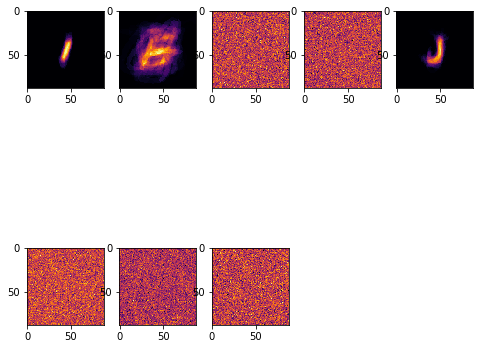

In [112]:
# Plot a prototype
fig = plt.figure(figsize=(8,8))
columns = 5
rows = 2
for y in range(columns*rows-2):
    fig.add_subplot(rows, columns, y+1)
    plt.imshow(W[y-1,:].reshape((88,88), order = 'F'),interpolation = 'nearest', cmap='inferno')

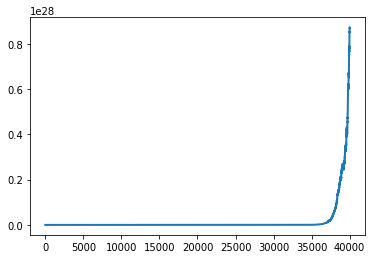

In [113]:
# Plot running average
plt.plot(wCount[0,0:tmax], linewidth=2.0, label='rate')